# LIBRARIES

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import functions as func
import os
from scipy.optimize import curve_fit

<style>
    /* Apply CSS to the heading to expand the background */
    h2 {
        background-color: yellow;
        padding: 10px;
        width: 100%; /* Expand the width to 100% */
        color: black; /* Set the text color to blue */
    }
</style>

## Measurements.


### <span style="background-color: white; padding: 10px;"><font color='black'>Measurement constants.</font></span>


#### Chip selection

In [6]:
chip_conf_dict = {
    '8x8_MZI_X_1': {
        "chip_color"        : "green1",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '8x8_3MZI_1': {
        "chip_color"        : "green2",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '8x8_MZI_X_2': {
        "chip_color"        : "green3",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '8x8_3MZI_2': {
        "chip_color"        : "green4",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '4x4_MZI_Sim_part2': {
        "chip_color"        : "red",
        "phase_shifter_mzm" : [ 30, 29, 28, 27, 26, 25, 24, 23 ],
        "phase_shifters"    : [[ [32, 34], [31, 33] ],
                               [ [36, 37] ],
                               [ [39, 40], [41, 43] ],
                               [ [44, 46] ]
                              ],
        "phase_mask"        : [45, 42, 38, 35],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '4x4_MZI_Sim_part1': {
        "chip_color"        : "orange",
        "phase_shifter_mzm" : [ 71, 72, 73, 74, 72, 71, 70, 69 ],
        "phase_shifters"    : [[ [79, 81], [81, 82] ],
                               [ [83, 85] ],
                               [ [86, 88], [90, 91] ],
                               [ [93, 94] ]
                              ],
        "phase_mask"        : [92, 89, 87, 84],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '4x4_MZI_X': {
        "chip_color"        : "blue_top",
        "phase_shifter_mzm" : [ 30, 29, 28, 27, 26, 25, 24, 23 ],
        "phase_shifters"    : [[ [32, 34], [31, 33] ],
                               [ [36, 37] ],
                               [ [39, 40], [41, 43] ],
                               [ [44, 46] ]
                              ],
        "phase_mask"        : [45, 42, 38, 35],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '4x4_3MZI': {
        "chip_color"        : "blue_bottom",
        "phase_shifter_mzm" : [ 71, 72, 73, 74, 72, 71, 70, 69 ],
        "phase_shifters"    : [[ [79, 81], [81, 82] ],
                               [ [83, 85] ],
                               [ [86, 88], [90, 91] ],
                               [ [93, 94] ]
                              ],
        "phase_mask"        : [92, 89, 87, 84],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '8x8_MZI': {
        "chip_color": "purple",
        "phase_shifter_mzm": None,
        "phase_shifters": None,
        "phase_mask": None,
        "nidaq_list":[0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    }
}


#### Chip selection

In [7]:
chip_name = "4x4_MZI_X"
chip_selection = chip_conf_dict[chip_name]
chip_color, phase_shifter_mzm,phase_shifters, phase_mask,nidaq_channels = tuple(chip_selection.values())

#### Sampling contants

In [8]:
n_sample      = 50
N             = 16
sampling_rate = 480000 / len(nidaq_channels)

#### MZI dictionnaries

### <span style="background-color: white; padding: 10px;"><font color='black'>Individual measurements.</font></span>


In [9]:
# voltage
v_max = 6.5

# current
i_max = 13

# step
step_iv = 0.1

N_STEP = int(i_max / step_iv)


In [12]:
import importlib
importlib.reload(func)

<module 'functions' from 'c:\\Users\\QPG\\Downloads\\Marseille\\Marseille\\functions.py'>

In [13]:
phase_shifters[2][1][0]

41

In [86]:
input = True
if input:
    phase_shifter_port = phase_shifter_mzm[7]
    current = np.arange(0, i_max, step_iv)
    current_squared = current**2
    V_raw,I_raw,V_phs,I_phs = func.sweep_current_collect_ports(phase_shifter_port,nidaq_channels,sampling_rate,n_sample,i_max,step_iv)
    P = func.to_mean_power(V_raw,I_raw)
    # func.plot_channels(P, current_squared, phase_shifter_port)
    # DevInfo = func.device_tunning_info(phase_shifter_port, V_raw, I_raw,V_phs, I_phs, None, current)
    # func.save_dict(DevInfo, f"blue\\phase_shifter\\current\\0")

Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0005 Current -0.0042
Voltage 0.0521 Current 0.1096
Voltage 0.0972 Current 0.2105
Voltage 0.1416 Current 0.3131
Voltage 0.1863 Current 0.4141
Voltage 0.2337 Current 0.5164
Voltage 0.2819 Current 0.6175
Voltage 0.3318 Current 0.7206
Voltage 0.3809 Current 0.8212
Voltage 0.4312 Current 0.9238
Voltage 0.4807 Current 1.0248
Voltage 0.531 Current 1.1272
Voltage 0.5805 Current 1.2288
Voltage 0.6303 Current 1.3305
Voltage 0.6801 Current 1.4328
Voltage 0.7293 Current 1.5342
Voltage 0.7791 Current 1.6373
Voltage 0.8283 Current 1.7399
Voltage 0.8781 Current 1.843
Voltage 0.9267 Current 1.9433
Voltage 0.9763 Current 2.046
Voltage 1.0249 Current 2.1469
Voltage 1.0744 Current 2.2497
Voltage 1.123 Current 2.3505
Voltage 1.1722 Current 2.4529
Voltage 1.2206 Current 2.5545
Voltage 1.2694 Current 2.6566
Voltage 1.3177 Current 2.7576
Voltage 1.3662 

In [67]:
phase_shifter_set_ports = [ phase_shifters[0][0][0],
                            phase_shifters[0][0][1],
                            phase_shifters[0][1][0],
                            phase_shifters[0][1][1],
                            phase_shifter_mzm[0],
                            phase_shifter_mzm[2],
                            phase_shifter_mzm[4],
                            phase_shifter_mzm[6]
                        ]
phase_shifter_set_ports

[32, 34, 31, 33, 30, 28, 26, 24]

Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0011 Current -0.01
Voltage 0.049 Current 0.097
Voltage 0.0937 Current 0.1984
Voltage 0.1374 Current 0.3005
Voltage 0.1816 Current 0.4025
Voltage 0.2281 Current 0.5054
Voltage 0.2754 Current 0.6071
Voltage 0.3243 Current 0.71
Voltage 0.3727 Current 0.8108
Voltage 0.4219 Current 0.9139
Voltage 0.4703 Current 1.0152
Voltage 0.5194 Current 1.1183
Voltage 0.5679 Current 1.2201
Voltage 0.6164 Current 1.3225
Voltage 0.6648 Current 1.4242
Voltage 0.7128 Current 1.5262
Voltage 0.7612 Current 1.6293
Voltage 0.809 Current 1.732
Voltage 0.8571 Current 1.8352
Voltage 0.9045 Current 1.9369
Voltage 0.9525 Current 2.0399
Voltage 0.9997 Current 2.1411
Voltage 1.0475 Current 2.2446
Voltage 1.0947 Current 2.3466
Voltage 1.1422 Current 2.4494
Voltage 1.1891 Current 2.5501
Voltage 1.2363 Current 2.6528
Voltage 1.2832 Current 2.7552
Voltage 1.3302 Curr

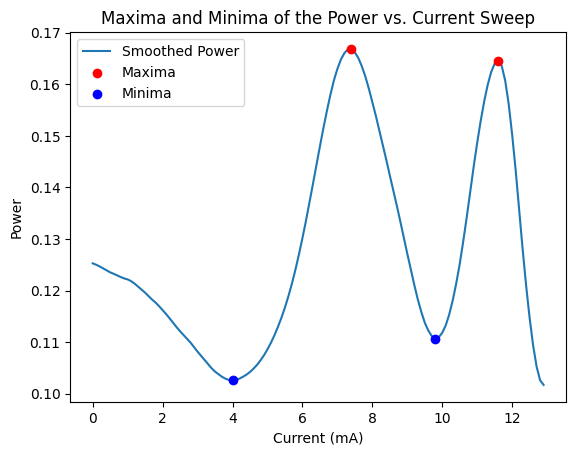

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_0.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0448 Current -0.0007
Voltage 0.0939 Current 0.1098
Voltage 0.1366 Current 0.21
Voltage 0.1805 Current 0.3125
Voltage 0.2253 Current 0.414
Voltage 0.2724 Current 0.5165
Voltage 0.3194 Current 0.6178
Voltage 0.3678 Current 0.7202
Voltage 0.4155 Current 0.8212
Voltage 0.464 Current 0.9246
Voltage 0.5114 Current 1.0244
Voltage 0.5598 Current 1.127
Voltage 0.6074 Current 1.2295
Voltage 0.655 Current 1.331
Voltage 0.7024 Current 1.4324
Voltage 0.7496 Current 1.5334
Voltage 0.7972 Current 1.636
Voltage 0.8439 Current 1.7357
Voltage 0.8914 Current 1.8378
Voltage 0.9379 Current 1.9381
Voltage 0.9852 Current 2.0404
Voltage 1.0313 Current 2.1412
Voltage 1.0784 Current 2.2434
Voltage 1.1247 Current 2.3455
Voltage 1.1715 Current 2.4484
Voltage 1.2174 Current 2.549
Voltage 1.2639 Current 

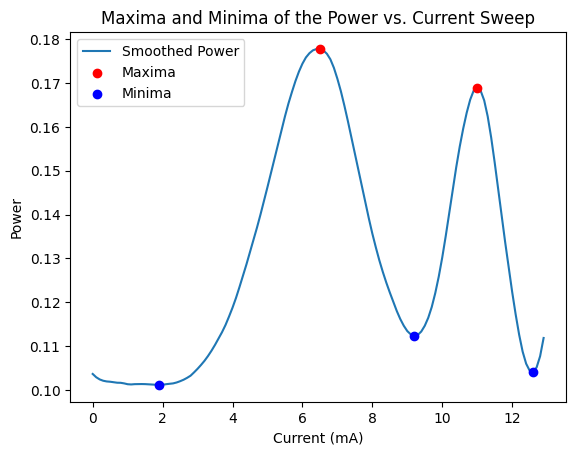

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_0.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0368 Current -0.0041
Voltage 0.0747 Current 0.106
Voltage 0.1236 Current 0.2065
Voltage 0.166 Current 0.31
Voltage 0.2101 Current 0.4104
Voltage 0.2594 Current 0.5132
Voltage 0.3044 Current 0.6147
Voltage 0.3574 Current 0.7179
Voltage 0.4014 Current 0.8188
Voltage 0.4489 Current 0.9225
Voltage 0.4968 Current 1.0228
Voltage 0.5479 Current 1.1262
Voltage 0.5974 Current 1.2272
Voltage 0.6419 Current 1.3293
Voltage 0.6898 Current 1.431
Voltage 0.7372 Current 1.5323
Voltage 0.7857 Current 1.6342
Voltage 0.8353 Current 1.7349
Voltage 0.8787 Current 1.8373
Voltage 0.931 Current 1.9374
Voltage 0.978 Current 2.0399
Voltage 1.0218 Current 2.1414
Voltage 1.0694 Current 2.245
Voltage 1.117 Current 2.3457
Voltage 1.1667 Current 2.4485
Voltage 1.2121 Current 2.5497
Voltage 1.2554 Current 

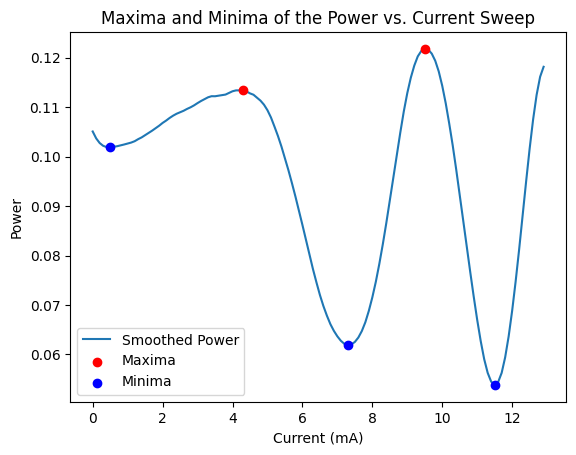

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_0.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 6.0024 Current -0.0018
Voltage 0.0747 Current 0.1077
Voltage 0.1206 Current 0.2087
Voltage 0.1638 Current 0.3109
Voltage 0.2093 Current 0.4118
Voltage 0.2556 Current 0.5139
Voltage 0.3035 Current 0.6153
Voltage 0.3513 Current 0.7175
Voltage 0.4 Current 0.8189
Voltage 0.4477 Current 0.9213
Voltage 0.4963 Current 1.0222
Voltage 0.5439 Current 1.1248
Voltage 0.5922 Current 1.2259
Voltage 0.6397 Current 1.328
Voltage 0.6875 Current 1.4295
Voltage 0.7351 Current 1.5297
Voltage 0.7822 Current 1.6317
Voltage 0.8299 Current 1.7322
Voltage 0.8768 Current 1.8347
Voltage 0.9244 Current 1.9355
Voltage 0.971 Current 2.0382
Voltage 1.0182 Current 2.139
Voltage 1.0646 Current 2.2422
Voltage 1.1118 Current 2.3429
Voltage 1.1581 Current 2.446
Voltage 1.205 Current 2.5463
Voltage 1.2511 Current

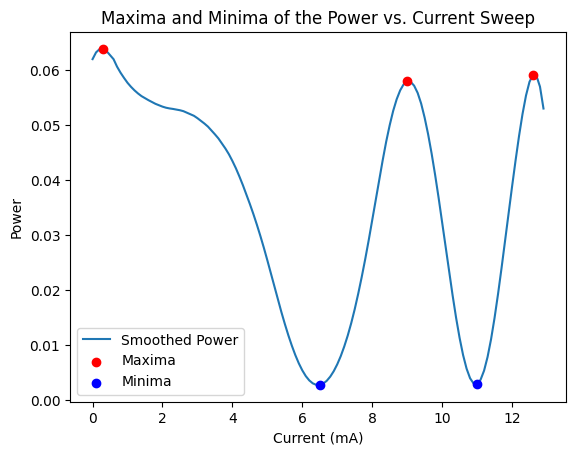

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_0.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 1.9416 Current -0.0104
Voltage 0.1372 Current 0.0971
Voltage 0.1808 Current 0.1978
Voltage 0.2264 Current 0.3008
Voltage 0.2732 Current 0.402
Voltage 0.3214 Current 0.5054
Voltage 0.3696 Current 0.6072
Voltage 0.4185 Current 0.7103
Voltage 0.4667 Current 0.8115
Voltage 0.5155 Current 0.9142
Voltage 0.5634 Current 1.0159
Voltage 0.612 Current 1.1184
Voltage 0.6601 Current 1.221
Voltage 0.7081 Current 1.3233
Voltage 0.756 Current 1.4258
Voltage 0.8036 Current 1.5286
Voltage 0.8514 Current 1.631
Voltage 0.8987 Current 1.7336
Voltage 0.9463 Current 1.8374
Voltage 0.9933 Current 1.9383
Voltage 1.0409 Current 2.0414
Voltage 1.0875 Current 2.1426
Voltage 1.1349 Current 2.2461
Voltage 1.1817 Current 2.3481
Voltage 1.2288 Current 2.4512
Voltage 1.2751 Current 2.5516
Voltage 1.3219 Curr

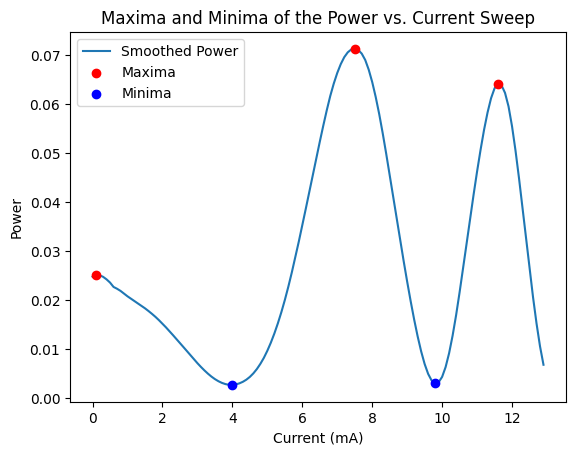

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_1.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.7926 Current -0.0004
Voltage 0.1734 Current 0.1088
Voltage 0.2173 Current 0.2094
Voltage 0.2634 Current 0.3126
Voltage 0.31 Current 0.4137
Voltage 0.358 Current 0.516
Voltage 0.4053 Current 0.6176
Voltage 0.4536 Current 0.7208
Voltage 0.5011 Current 0.8213
Voltage 0.5493 Current 0.9244
Voltage 0.5963 Current 1.0249
Voltage 0.6443 Current 1.1279
Voltage 0.6916 Current 1.2297
Voltage 0.7389 Current 1.3311
Voltage 0.786 Current 1.4327
Voltage 0.8328 Current 1.5332
Voltage 0.8801 Current 1.6352
Voltage 0.9265 Current 1.736
Voltage 0.9736 Current 1.8379
Voltage 1.0199 Current 1.9388
Voltage 1.0669 Current 2.042
Voltage 1.1127 Current 2.1425
Voltage 1.1595 Current 2.2454
Voltage 1.2055 Current 2.3475
Voltage 1.2521 Current 2.4499
Voltage 1.2977 Current 2.5507
Voltage 1.3439 Curren

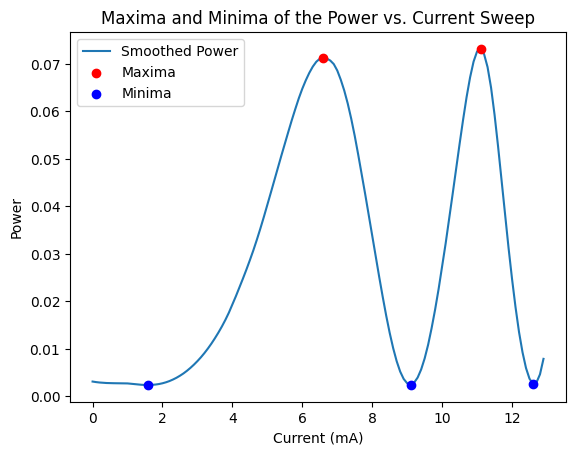

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_1.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0705 Current -0.0044
Voltage 0.1081 Current 0.1053
Voltage 0.1578 Current 0.207
Voltage 0.2025 Current 0.3092
Voltage 0.2465 Current 0.4108
Voltage 0.2921 Current 0.5134
Voltage 0.3422 Current 0.6148
Voltage 0.3908 Current 0.7189
Voltage 0.4354 Current 0.8195
Voltage 0.4892 Current 0.9228
Voltage 0.5333 Current 1.0237
Voltage 0.581 Current 1.1268
Voltage 0.6326 Current 1.2284
Voltage 0.6767 Current 1.3302
Voltage 0.7243 Current 1.4325
Voltage 0.7778 Current 1.5329
Voltage 0.8201 Current 1.635
Voltage 0.8677 Current 1.7358
Voltage 0.9161 Current 1.8382
Voltage 0.9616 Current 1.9385
Voltage 1.0116 Current 2.0418
Voltage 1.055 Current 2.1432
Voltage 1.1061 Current 2.2466
Voltage 1.151 Current 2.3475
Voltage 1.2 Current 2.4513
Voltage 1.2436 Current 2.5522
Voltage 1.2909 Current

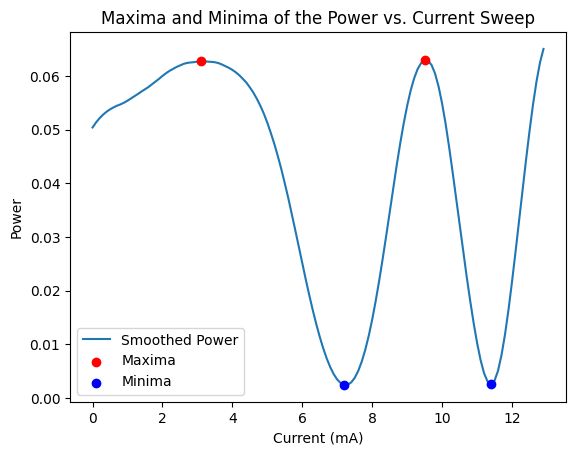

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_1.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0559 Current -0.0012
Voltage 0.0563 Current 0.1068
Voltage 0.1029 Current 0.2078
Voltage 0.1457 Current 0.31
Voltage 0.1904 Current 0.4115
Voltage 0.2358 Current 0.514
Voltage 0.2834 Current 0.6151
Voltage 0.331 Current 0.7185
Voltage 0.3796 Current 0.8193
Voltage 0.4272 Current 0.9217
Voltage 0.4759 Current 1.0231
Voltage 0.5236 Current 1.1255
Voltage 0.5718 Current 1.2267
Voltage 0.6194 Current 1.3286
Voltage 0.6673 Current 1.4304
Voltage 0.7149 Current 1.5311
Voltage 0.7621 Current 1.6333
Voltage 0.8097 Current 1.7338
Voltage 0.8568 Current 1.8361
Voltage 0.9044 Current 1.9371
Voltage 0.9509 Current 2.0396
Voltage 0.9983 Current 2.1399
Voltage 1.0447 Current 2.2431
Voltage 1.0919 Current 2.3442
Voltage 1.1383 Current 2.4476
Voltage 1.1852 Current 2.5486
Voltage 1.2314 Cur

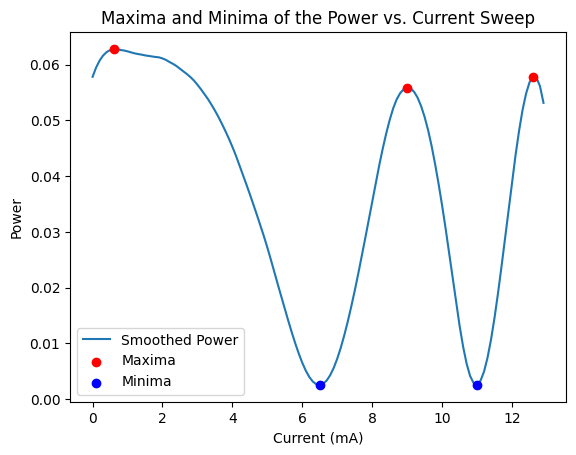

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_1.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 1.8757 Current -0.0105
Voltage 0.1199 Current 0.0964
Voltage 0.1631 Current 0.1983
Voltage 0.2081 Current 0.3007
Voltage 0.2542 Current 0.4028
Voltage 0.3022 Current 0.5056
Voltage 0.3502 Current 0.6073
Voltage 0.3991 Current 0.7108
Voltage 0.4473 Current 0.8117
Voltage 0.4962 Current 0.9144
Voltage 0.5443 Current 1.016
Voltage 0.593 Current 1.1191
Voltage 0.6411 Current 1.2213
Voltage 0.6892 Current 1.324
Voltage 0.7372 Current 1.4266
Voltage 0.7849 Current 1.5289
Voltage 0.8328 Current 1.6322
Voltage 0.8802 Current 1.7349
Voltage 0.928 Current 1.8375
Voltage 0.975 Current 1.9396
Voltage 1.0226 Current 2.0422
Voltage 1.0694 Current 2.1441
Voltage 1.1168 Current 2.2464
Voltage 1.1636 Current 2.3491
Voltage 1.2107 Current 2.4522
Voltage 1.2572 Current 2.5536
Voltage 1.3041 Curr

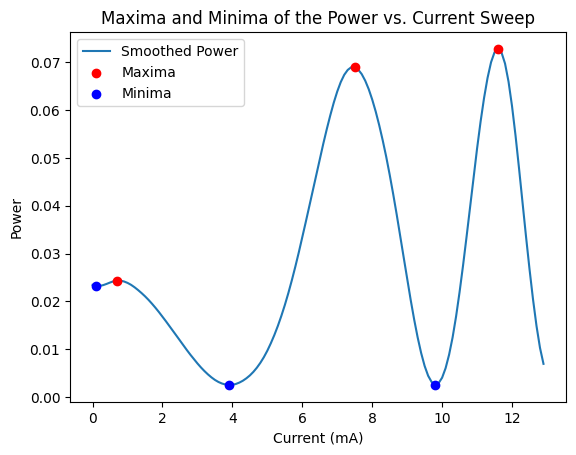

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_2.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.8061 Current -0.0006
Voltage 0.1545 Current 0.1085
Voltage 0.1977 Current 0.21
Voltage 0.2431 Current 0.3131
Voltage 0.2892 Current 0.4141
Voltage 0.337 Current 0.5168
Voltage 0.3843 Current 0.6176
Voltage 0.4326 Current 0.7209
Voltage 0.4801 Current 0.8221
Voltage 0.5284 Current 0.9249
Voltage 0.5755 Current 1.0255
Voltage 0.6236 Current 1.1286
Voltage 0.671 Current 1.2303
Voltage 0.7183 Current 1.3319
Voltage 0.7654 Current 1.4336
Voltage 0.8124 Current 1.5343
Voltage 0.8597 Current 1.636
Voltage 0.9062 Current 1.7365
Voltage 0.9533 Current 1.8388
Voltage 0.9997 Current 1.9406
Voltage 1.0466 Current 2.043
Voltage 1.0925 Current 2.1437
Voltage 1.1394 Current 2.246
Voltage 1.1855 Current 2.3477
Voltage 1.2321 Current 2.4512
Voltage 1.2777 Current 2.5526
Voltage 1.324 Current

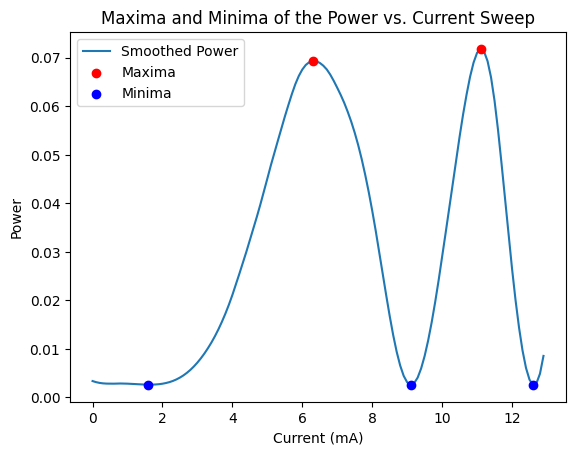

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_2.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.1225 Current -0.004
Voltage 0.1632 Current 0.1054
Voltage 0.2077 Current 0.2068
Voltage 0.2533 Current 0.3098
Voltage 0.2979 Current 0.4109
Voltage 0.3519 Current 0.5141
Voltage 0.3956 Current 0.6155
Voltage 0.4434 Current 0.7194
Voltage 0.4911 Current 0.82
Voltage 0.544 Current 0.9236
Voltage 0.587 Current 1.0242
Voltage 0.6372 Current 1.127
Voltage 0.6869 Current 1.2283
Voltage 0.7299 Current 1.3306
Voltage 0.7794 Current 1.4318
Voltage 0.8289 Current 1.533
Voltage 0.8753 Current 1.6346
Voltage 0.9228 Current 1.7356
Voltage 0.9693 Current 1.8387
Voltage 1.0163 Current 1.9398
Voltage 1.0612 Current 2.0433
Voltage 1.1083 Current 2.1442
Voltage 1.1554 Current 2.2468
Voltage 1.2023 Current 2.3487
Voltage 1.2518 Current 2.4517
Voltage 1.2987 Current 2.5532
Voltage 1.3404 Curren

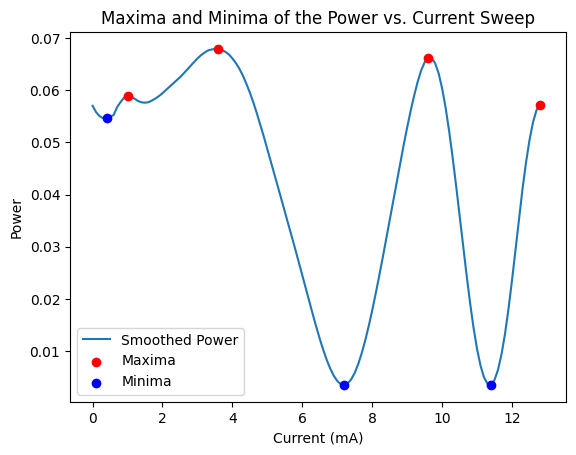

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_2.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.081 Current -0.001
Voltage 0.0813 Current 0.1066
Voltage 0.1273 Current 0.2078
Voltage 0.1705 Current 0.3107
Voltage 0.2159 Current 0.4116
Voltage 0.262 Current 0.5149
Voltage 0.3098 Current 0.616
Voltage 0.3575 Current 0.7184
Voltage 0.4061 Current 0.8193
Voltage 0.4537 Current 0.9226
Voltage 0.5022 Current 1.0238
Voltage 0.5498 Current 1.1262
Voltage 0.598 Current 1.2271
Voltage 0.6456 Current 1.329
Voltage 0.6933 Current 1.4305
Voltage 0.741 Current 1.5314
Voltage 0.7881 Current 1.6329
Voltage 0.8356 Current 1.7343
Voltage 0.8827 Current 1.8366
Voltage 0.9302 Current 1.9376
Voltage 0.9767 Current 2.0399
Voltage 1.024 Current 2.1416
Voltage 1.0704 Current 2.2443
Voltage 1.1176 Current 2.3451
Voltage 1.1638 Current 2.4481
Voltage 1.2108 Current 2.5495
Voltage 1.2569 Current

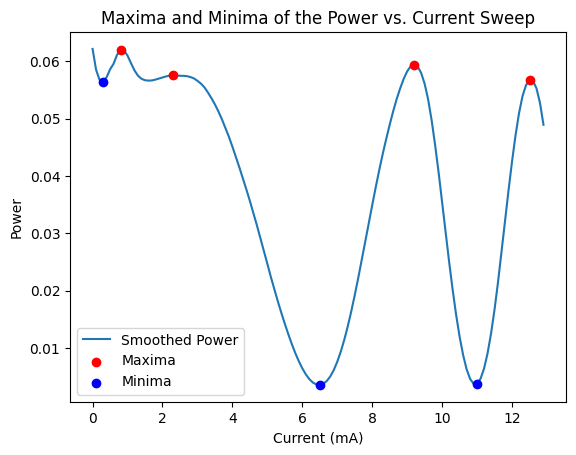

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_2.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 1.9512 Current -0.0103
Voltage 0.194 Current 0.0966
Voltage 0.239 Current 0.1979
Voltage 0.286 Current 0.3008
Voltage 0.3333 Current 0.403
Voltage 0.3817 Current 0.5056
Voltage 0.4296 Current 0.608
Voltage 0.4783 Current 0.711
Voltage 0.5261 Current 0.8119
Voltage 0.5746 Current 0.9156
Voltage 0.6221 Current 1.0164
Voltage 0.6704 Current 1.1202
Voltage 0.7181 Current 1.2224
Voltage 0.7657 Current 1.3251
Voltage 0.8133 Current 1.428
Voltage 0.8605 Current 1.5311
Voltage 0.908 Current 1.6333
Voltage 0.955 Current 1.7354
Voltage 1.0024 Current 1.839
Voltage 1.049 Current 1.9402
Voltage 1.0962 Current 2.0433
Voltage 1.1426 Current 2.1448
Voltage 1.1896 Current 2.2484
Voltage 1.2361 Current 2.3503
Voltage 1.2829 Current 2.4527
Voltage 1.329 Current 2.5544
Voltage 1.3754 Current 2.6

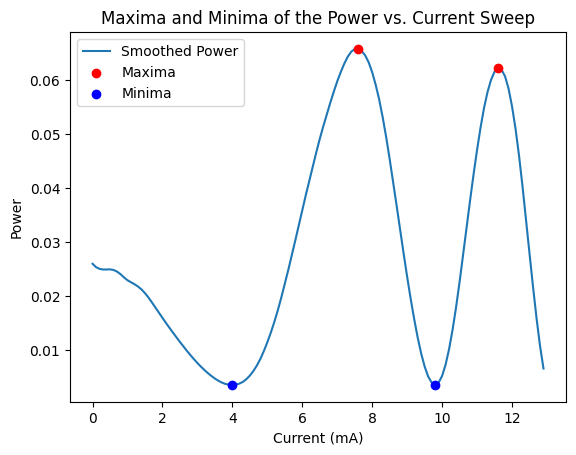

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_3.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.108 Current -0.0004
Voltage 0.1553 Current 0.1094
Voltage 0.1989 Current 0.2104
Voltage 0.2442 Current 0.3135
Voltage 0.2902 Current 0.4144
Voltage 0.3378 Current 0.5173
Voltage 0.385 Current 0.6187
Voltage 0.4332 Current 0.7213
Voltage 0.4808 Current 0.8222
Voltage 0.529 Current 0.9251
Voltage 0.5761 Current 1.0266
Voltage 0.6241 Current 1.1293
Voltage 0.6715 Current 1.2307
Voltage 0.7188 Current 1.3325
Voltage 0.7659 Current 1.4345
Voltage 0.8128 Current 1.5355
Voltage 0.8602 Current 1.6376
Voltage 0.9066 Current 1.7382
Voltage 0.9538 Current 1.8399
Voltage 1.0 Current 1.9411
Voltage 1.047 Current 2.0439
Voltage 1.0929 Current 2.1452
Voltage 1.1397 Current 2.248
Voltage 1.1859 Current 2.3499
Voltage 1.2324 Current 2.4521
Voltage 1.278 Current 2.5541
Voltage 1.3243 Current 

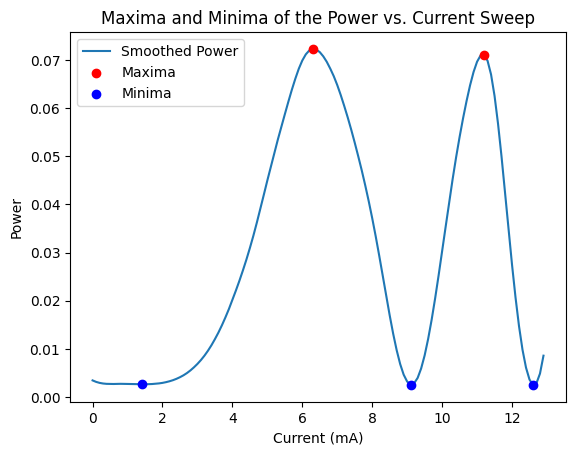

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_3.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.1232 Current -0.0041
Voltage 0.1608 Current 0.1059
Voltage 0.2113 Current 0.2069
Voltage 0.2535 Current 0.3099
Voltage 0.2983 Current 0.4111
Voltage 0.3505 Current 0.5142
Voltage 0.3988 Current 0.6158
Voltage 0.4457 Current 0.7193
Voltage 0.484 Current 0.8197
Voltage 0.5399 Current 0.9234
Voltage 0.5881 Current 1.0244
Voltage 0.6382 Current 1.1279
Voltage 0.6862 Current 1.229
Voltage 0.732 Current 1.3311
Voltage 0.779 Current 1.4326
Voltage 0.8263 Current 1.5331
Voltage 0.8744 Current 1.6353
Voltage 0.9224 Current 1.7364
Voltage 0.9716 Current 1.8398
Voltage 1.0153 Current 1.9402
Voltage 1.0653 Current 2.0439
Voltage 1.1091 Current 2.1449
Voltage 1.16 Current 2.2479
Voltage 1.2031 Current 2.3491
Voltage 1.2487 Current 2.4526
Voltage 1.2949 Current 2.5536
Voltage 1.3429 Curre

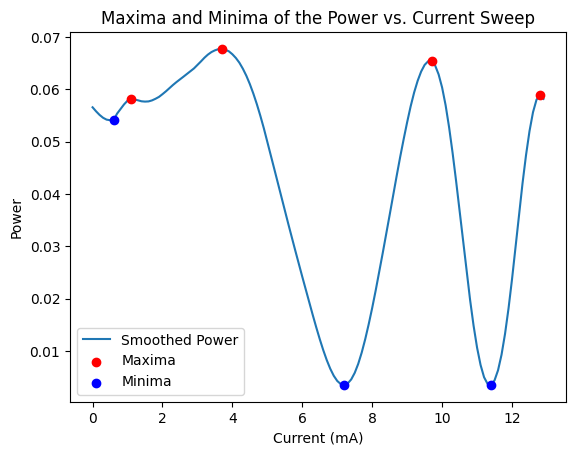

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_3.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 2.9786 Current -0.001
Voltage 0.0817 Current 0.1072
Voltage 0.1276 Current 0.2081
Voltage 0.1708 Current 0.3107
Voltage 0.2162 Current 0.4114
Voltage 0.2622 Current 0.5141
Voltage 0.31 Current 0.6162
Voltage 0.3577 Current 0.719
Voltage 0.4062 Current 0.8193
Voltage 0.4538 Current 0.9219
Voltage 0.5024 Current 1.0233
Voltage 0.5499 Current 1.1263
Voltage 0.5982 Current 1.2275
Voltage 0.6457 Current 1.3292
Voltage 0.6934 Current 1.4313
Voltage 0.741 Current 1.5312
Voltage 0.7882 Current 1.6339
Voltage 0.8357 Current 1.7343
Voltage 0.8828 Current 1.837
Voltage 0.9303 Current 1.9375
Voltage 0.9768 Current 2.0405
Voltage 1.0241 Current 2.1417
Voltage 1.0704 Current 2.2445
Voltage 1.1176 Current 2.3456
Voltage 1.1639 Current 2.4483
Voltage 1.2108 Current 2.55
Voltage 1.257 Current 

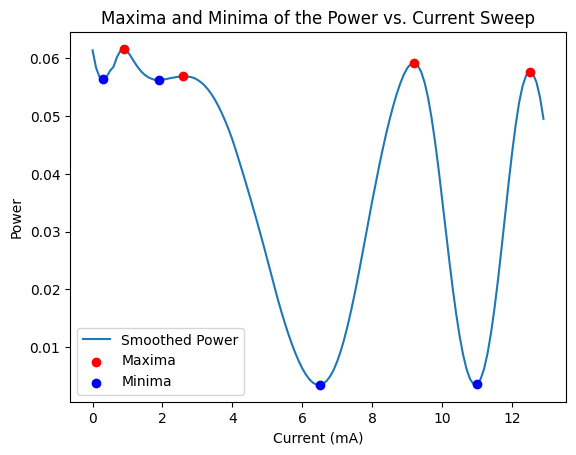

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_3.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 1.9699 Current -0.0099
Voltage 0.1942 Current 0.0967
Voltage 0.2391 Current 0.1981
Voltage 0.286 Current 0.3007
Voltage 0.3333 Current 0.403
Voltage 0.3817 Current 0.5058
Voltage 0.4296 Current 0.6077
Voltage 0.4782 Current 0.7107
Voltage 0.526 Current 0.812
Voltage 0.5745 Current 0.9149
Voltage 0.6221 Current 1.0161
Voltage 0.6703 Current 1.1197
Voltage 0.718 Current 1.223
Voltage 0.7656 Current 1.3252
Voltage 0.8132 Current 1.4282
Voltage 0.8604 Current 1.5307
Voltage 0.9079 Current 1.6334
Voltage 0.9549 Current 1.7357
Voltage 1.0022 Current 1.8391
Voltage 1.0488 Current 1.9409
Voltage 1.0961 Current 2.0438
Voltage 1.1424 Current 2.1453
Voltage 1.1895 Current 2.2483
Voltage 1.236 Current 2.3502
Voltage 1.2827 Current 2.4536
Voltage 1.3288 Current 2.555
Voltage 1.3754 Current

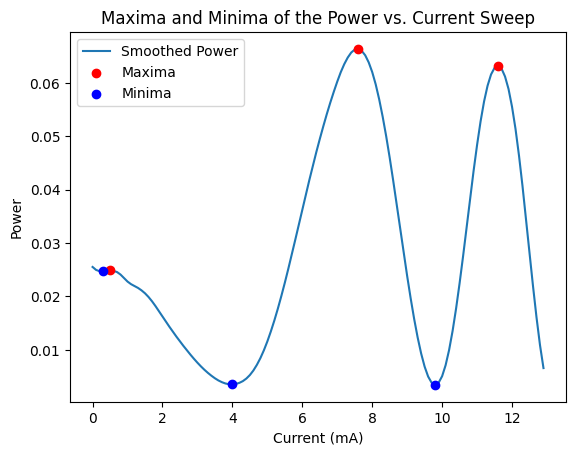

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_4.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.1436 Current -0.0008
Voltage 0.191 Current 0.1093
Voltage 0.2353 Current 0.2104
Voltage 0.2815 Current 0.3132
Voltage 0.3281 Current 0.4142
Voltage 0.376 Current 0.5171
Voltage 0.4232 Current 0.6186
Voltage 0.4714 Current 0.7216
Voltage 0.5187 Current 0.823
Voltage 0.5668 Current 0.9257
Voltage 0.6137 Current 1.0263
Voltage 0.6616 Current 1.1295
Voltage 0.7088 Current 1.2311
Voltage 0.756 Current 1.3327
Voltage 0.803 Current 1.4339
Voltage 0.8497 Current 1.5351
Voltage 0.8969 Current 1.6368
Voltage 0.9432 Current 1.7373
Voltage 0.9902 Current 1.8402
Voltage 1.0364 Current 1.9414
Voltage 1.0833 Current 2.0442
Voltage 1.129 Current 2.1448
Voltage 1.1757 Current 2.2486
Voltage 1.2217 Current 2.3505
Voltage 1.2681 Current 2.4533
Voltage 1.3136 Current 2.5536
Voltage 1.3598 Curre

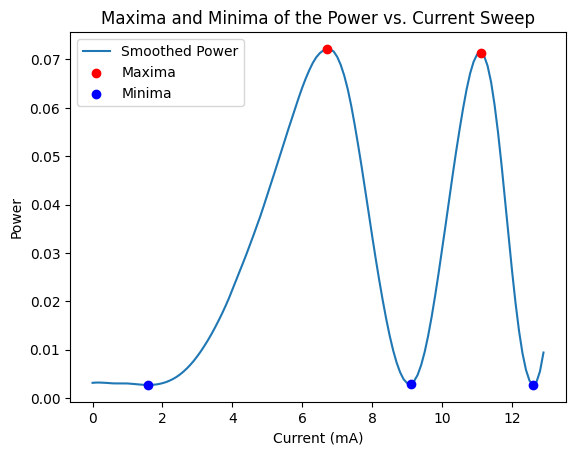

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_4.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 3.382 Current -0.0041
Voltage 0.1318 Current 0.1058
Voltage 0.176 Current 0.2067
Voltage 0.2217 Current 0.3098
Voltage 0.2706 Current 0.411
Voltage 0.3149 Current 0.5142
Voltage 0.3618 Current 0.6161
Voltage 0.4134 Current 0.7193
Voltage 0.4582 Current 0.8201
Voltage 0.5073 Current 0.924
Voltage 0.5592 Current 1.025
Voltage 0.6033 Current 1.1281
Voltage 0.651 Current 1.2293
Voltage 0.7004 Current 1.3309
Voltage 0.7487 Current 1.4334
Voltage 0.7943 Current 1.5335
Voltage 0.8413 Current 1.6363
Voltage 0.8896 Current 1.7367
Voltage 0.9371 Current 1.8397
Voltage 0.9848 Current 1.9404
Voltage 1.0317 Current 2.0436
Voltage 1.0758 Current 2.1451
Voltage 1.123 Current 2.2487
Voltage 1.1748 Current 2.35
Voltage 1.2207 Current 2.4538
Voltage 1.2632 Current 2.5546
Voltage 1.3144 Current 

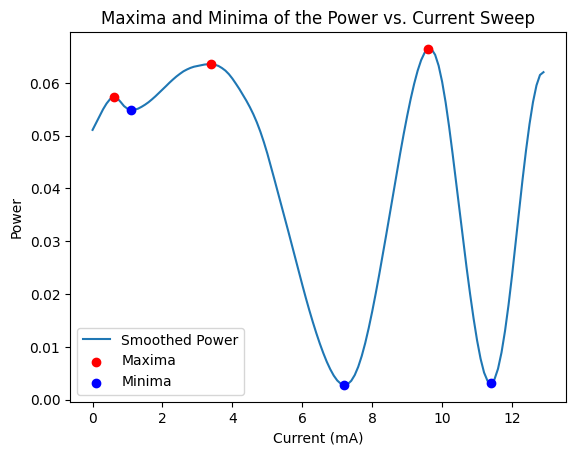

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_4.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 1.552 Current -0.0016
Voltage 0.0677 Current 0.1068
Voltage 0.1141 Current 0.2081
Voltage 0.1569 Current 0.3112
Voltage 0.2018 Current 0.4118
Voltage 0.2473 Current 0.5145
Voltage 0.2949 Current 0.6161
Voltage 0.3425 Current 0.7191
Voltage 0.391 Current 0.82
Voltage 0.4386 Current 0.9224
Voltage 0.4871 Current 1.0237
Voltage 0.5348 Current 1.1264
Voltage 0.5831 Current 1.2281
Voltage 0.6306 Current 1.3293
Voltage 0.6784 Current 1.432
Voltage 0.726 Current 1.5315
Voltage 0.7732 Current 1.6341
Voltage 0.8208 Current 1.7347
Voltage 0.8678 Current 1.8375
Voltage 0.9154 Current 1.938
Voltage 0.9619 Current 2.0412
Voltage 1.0092 Current 2.1421
Voltage 1.0556 Current 2.2451
Voltage 1.1028 Current 2.3463
Voltage 1.1491 Current 2.4492
Voltage 1.1961 Current 2.5506
Voltage 1.2422 Curren

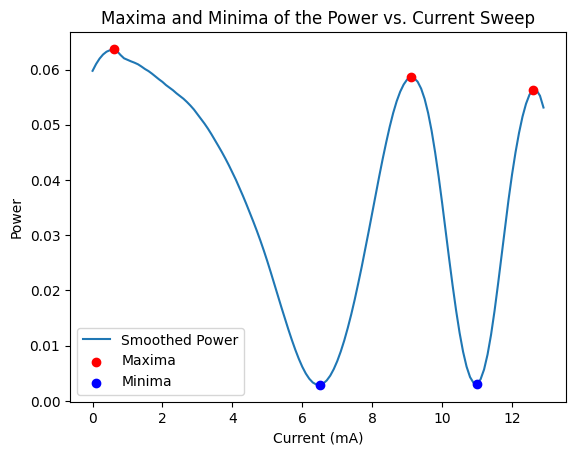

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_4.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0738 Current -0.0103
Voltage 0.1207 Current 0.0965
Voltage 0.164 Current 0.1983
Voltage 0.2087 Current 0.301
Voltage 0.2546 Current 0.4027
Voltage 0.3023 Current 0.5058
Voltage 0.3501 Current 0.6081
Voltage 0.399 Current 0.7106
Voltage 0.4471 Current 0.8123
Voltage 0.496 Current 0.9155
Voltage 0.544 Current 1.0166
Voltage 0.5927 Current 1.12
Voltage 0.6408 Current 1.222
Voltage 0.6888 Current 1.3244
Voltage 0.7368 Current 1.4271
Voltage 0.7845 Current 1.5306
Voltage 0.8324 Current 1.6335
Voltage 0.8798 Current 1.7358
Voltage 0.9275 Current 1.8388
Voltage 0.9745 Current 1.9407
Voltage 1.0221 Current 2.0438
Voltage 1.0688 Current 2.1454
Voltage 1.1162 Current 2.2485
Voltage 1.1631 Current 2.3504
Voltage 1.2102 Current 2.4535
Voltage 1.2566 Current 2.5554
Voltage 1.3035 Current

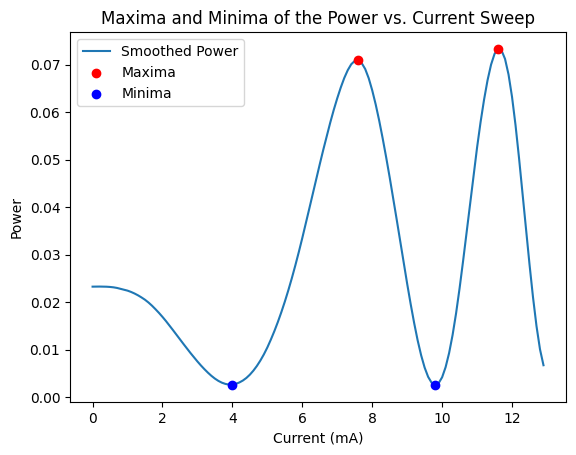

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_5.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.8925 Current -0.0007
Voltage 0.1912 Current 0.1092
Voltage 0.2353 Current 0.21
Voltage 0.2816 Current 0.3131
Voltage 0.3281 Current 0.4137
Voltage 0.376 Current 0.5171
Voltage 0.4233 Current 0.6181
Voltage 0.4714 Current 0.7215
Voltage 0.5188 Current 0.8222
Voltage 0.5669 Current 0.9256
Voltage 0.6138 Current 1.0264
Voltage 0.6617 Current 1.1289
Voltage 0.709 Current 1.2308
Voltage 0.7561 Current 1.3324
Voltage 0.8031 Current 1.434
Voltage 0.8499 Current 1.5351
Voltage 0.8971 Current 1.6367
Voltage 0.9434 Current 1.7372
Voltage 0.9903 Current 1.8396
Voltage 1.0366 Current 1.9412
Voltage 1.0834 Current 2.0447
Voltage 1.1292 Current 2.1448
Voltage 1.1759 Current 2.2481
Voltage 1.2219 Current 2.3498
Voltage 1.2683 Current 2.4526
Voltage 1.3138 Current 2.5542
Voltage 1.3599 Curr

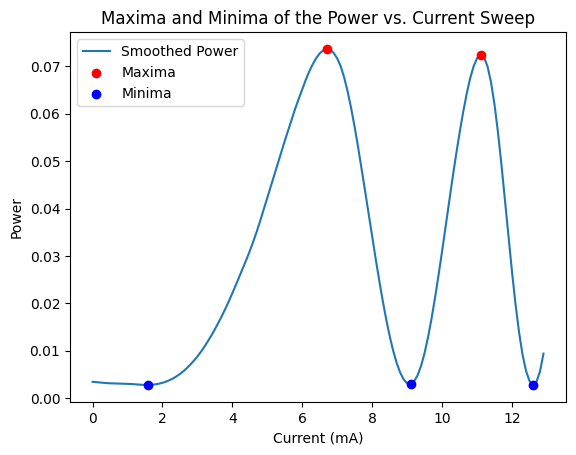

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_5.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.0928 Current -0.0037
Voltage 0.1298 Current 0.1057
Voltage 0.1773 Current 0.2066
Voltage 0.2217 Current 0.3099
Voltage 0.2655 Current 0.4112
Voltage 0.3177 Current 0.5144
Voltage 0.363 Current 0.6162
Voltage 0.411 Current 0.7192
Voltage 0.4575 Current 0.8202
Voltage 0.5091 Current 0.9235
Voltage 0.5543 Current 1.0248
Voltage 0.6032 Current 1.1281
Voltage 0.6537 Current 1.2297
Voltage 0.701 Current 1.3319
Voltage 0.7509 Current 1.4333
Voltage 0.7942 Current 1.5343
Voltage 0.8449 Current 1.6361
Voltage 0.8937 Current 1.7376
Voltage 0.937 Current 1.8402
Voltage 0.9861 Current 1.9409
Voltage 1.032 Current 2.0443
Voltage 1.0768 Current 2.145
Voltage 1.1234 Current 2.2486
Voltage 1.1703 Current 2.3502
Voltage 1.2172 Current 2.4537
Voltage 1.2648 Current 2.5549
Voltage 1.31 Current

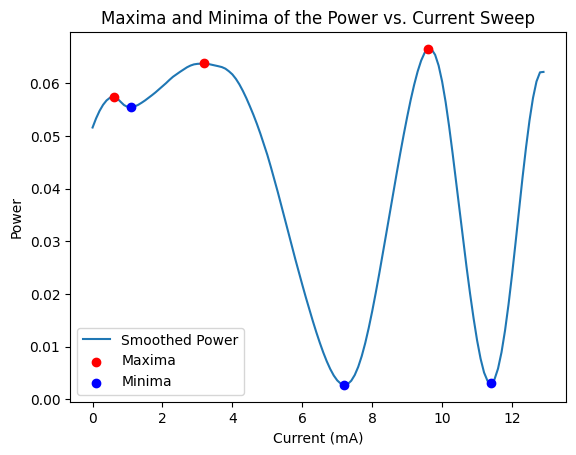

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_5.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 3.0366 Current -0.0012
Voltage 0.0678 Current 0.1074
Voltage 0.1142 Current 0.2083
Voltage 0.157 Current 0.3107
Voltage 0.2018 Current 0.4116
Voltage 0.2474 Current 0.5148
Voltage 0.2949 Current 0.6159
Voltage 0.3425 Current 0.7195
Voltage 0.391 Current 0.8201
Voltage 0.4386 Current 0.9224
Voltage 0.4871 Current 1.0236
Voltage 0.5348 Current 1.1267
Voltage 0.583 Current 1.2281
Voltage 0.6306 Current 1.33
Voltage 0.6783 Current 1.4314
Voltage 0.726 Current 1.5326
Voltage 0.7732 Current 1.6341
Voltage 0.8207 Current 1.735
Voltage 0.8678 Current 1.8374
Voltage 0.9153 Current 1.9383
Voltage 0.9618 Current 2.0414
Voltage 1.0092 Current 2.1423
Voltage 1.0556 Current 2.2455
Voltage 1.1028 Current 2.3466
Voltage 1.1491 Current 2.4493
Voltage 1.196 Current 2.5509
Voltage 1.2422 Current

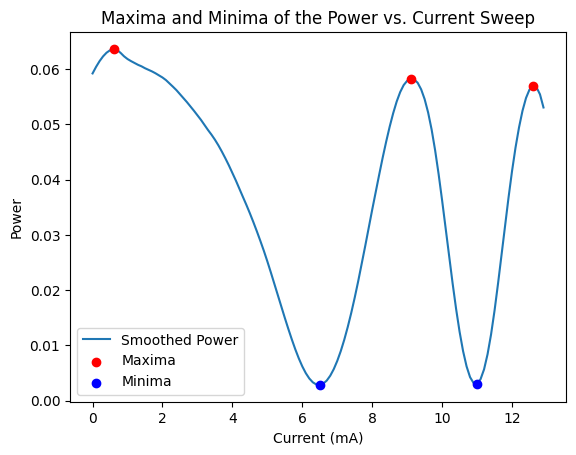

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_5.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 4.546 Current -0.0097
Voltage 0.1205 Current 0.097
Voltage 0.164 Current 0.1983
Voltage 0.2087 Current 0.301
Voltage 0.2546 Current 0.4027
Voltage 0.3023 Current 0.5064
Voltage 0.3501 Current 0.6076
Voltage 0.399 Current 0.7113
Voltage 0.4471 Current 0.8123
Voltage 0.496 Current 0.9157
Voltage 0.544 Current 1.0171
Voltage 0.5927 Current 1.1203
Voltage 0.6408 Current 1.2216
Voltage 0.6889 Current 1.3255
Voltage 0.7368 Current 1.428
Voltage 0.7844 Current 1.5304
Voltage 0.8324 Current 1.6338
Voltage 0.8797 Current 1.7364
Voltage 0.9275 Current 1.8392
Voltage 0.9745 Current 1.9405
Voltage 1.0221 Current 2.044
Voltage 1.0688 Current 2.1452
Voltage 1.1162 Current 2.249
Voltage 1.163 Current 2.3506
Voltage 1.2102 Current 2.4533
Voltage 1.2566 Current 2.555
Voltage 1.3034 Current 2.6

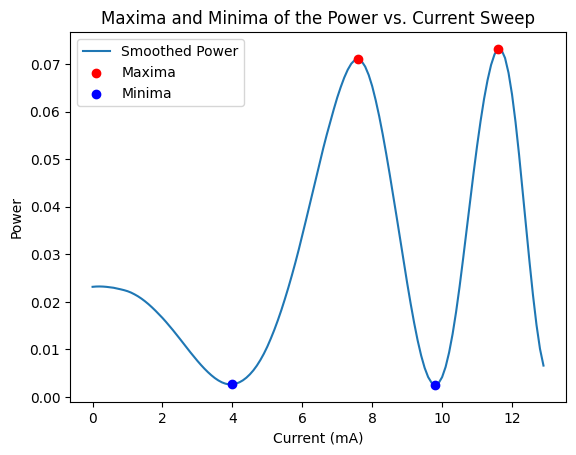

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_6.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.8842 Current -0.0006
Voltage 0.1914 Current 0.1087
Voltage 0.2354 Current 0.21
Voltage 0.2817 Current 0.3128
Voltage 0.3282 Current 0.414
Voltage 0.3761 Current 0.5169
Voltage 0.4233 Current 0.6184
Voltage 0.4715 Current 0.7216
Voltage 0.5189 Current 0.8229
Voltage 0.5669 Current 0.9256
Voltage 0.6138 Current 1.0262
Voltage 0.6617 Current 1.1291
Voltage 0.7089 Current 1.2308
Voltage 0.7561 Current 1.3324
Voltage 0.8031 Current 1.4337
Voltage 0.8499 Current 1.5347
Voltage 0.897 Current 1.6363
Voltage 0.9434 Current 1.7374
Voltage 0.9903 Current 1.8401
Voltage 1.0365 Current 1.9416
Voltage 1.0834 Current 2.0446
Voltage 1.1291 Current 2.1453
Voltage 1.1758 Current 2.2483
Voltage 1.2218 Current 2.3501
Voltage 1.2682 Current 2.4533
Voltage 1.3137 Current 2.5541
Voltage 1.3599 Cur

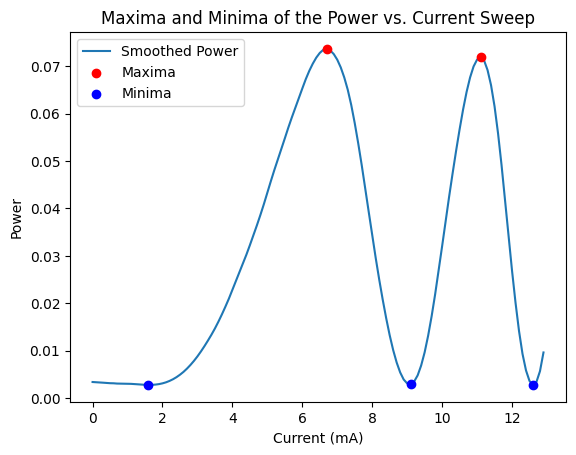

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_6.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 4.0458 Current -0.0034
Voltage 0.1325 Current 0.1057
Voltage 0.1773 Current 0.2064
Voltage 0.2244 Current 0.3102
Voltage 0.2661 Current 0.4111
Voltage 0.3177 Current 0.5146
Voltage 0.3663 Current 0.6152
Voltage 0.4138 Current 0.7193
Voltage 0.4574 Current 0.8203
Voltage 0.5065 Current 0.924
Voltage 0.5587 Current 1.025
Voltage 0.6054 Current 1.1282
Voltage 0.6513 Current 1.2296
Voltage 0.7019 Current 1.3315
Voltage 0.7469 Current 1.4337
Voltage 0.7935 Current 1.5344
Voltage 0.8449 Current 1.636
Voltage 0.89 Current 1.7369
Voltage 0.9358 Current 1.84
Voltage 0.9824 Current 1.9405
Voltage 1.0304 Current 2.0442
Voltage 1.0791 Current 2.1457
Voltage 1.1247 Current 2.2487
Voltage 1.1734 Current 2.3502
Voltage 1.2209 Current 2.4536
Voltage 1.264 Current 2.5547
Voltage 1.3088 Current

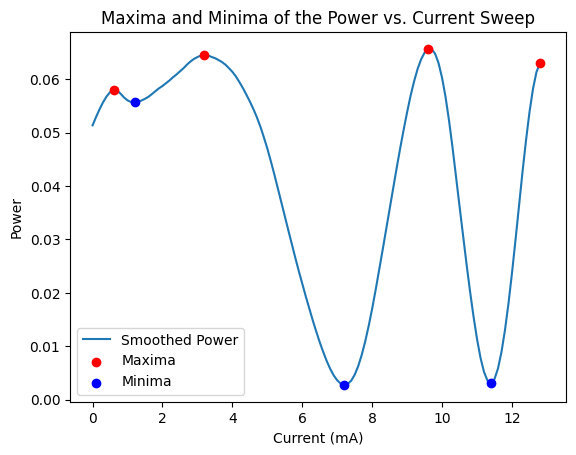

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_6.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 5.9442 Current -0.0016
Voltage 0.068 Current 0.1072
Voltage 0.1143 Current 0.2083
Voltage 0.1572 Current 0.3107
Voltage 0.2019 Current 0.412
Voltage 0.2474 Current 0.5145
Voltage 0.2949 Current 0.616
Voltage 0.3425 Current 0.7191
Voltage 0.391 Current 0.8197
Voltage 0.4386 Current 0.9228
Voltage 0.4871 Current 1.0238
Voltage 0.5347 Current 1.1264
Voltage 0.583 Current 1.2279
Voltage 0.6305 Current 1.3298
Voltage 0.6783 Current 1.4314
Voltage 0.7259 Current 1.5318
Voltage 0.7731 Current 1.6341
Voltage 0.8207 Current 1.7353
Voltage 0.8677 Current 1.8379
Voltage 0.9153 Current 1.9384
Voltage 0.9618 Current 2.0414
Voltage 1.0092 Current 2.1426
Voltage 1.0555 Current 2.2455
Voltage 1.1027 Current 2.3467
Voltage 1.149 Current 2.449
Voltage 1.196 Current 2.5508
Voltage 1.2421 Current

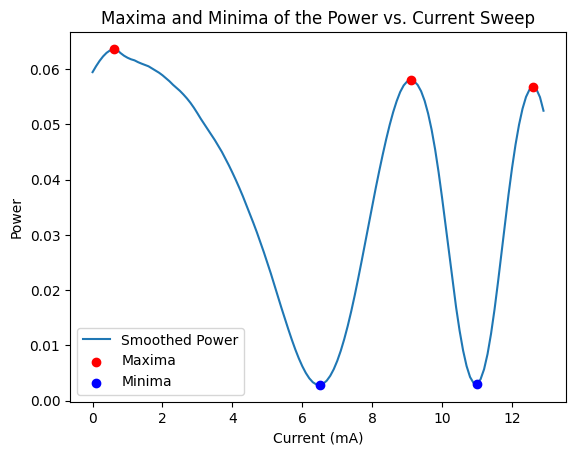

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_6.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 4.5339 Current -0.0102
Voltage 0.1206 Current 0.0963
Voltage 0.1641 Current 0.1978
Voltage 0.2088 Current 0.3007
Voltage 0.2547 Current 0.403
Voltage 0.3024 Current 0.5064
Voltage 0.3501 Current 0.6078
Voltage 0.399 Current 0.7109
Voltage 0.4471 Current 0.8124
Voltage 0.496 Current 0.9158
Voltage 0.5439 Current 1.0169
Voltage 0.5926 Current 1.1203
Voltage 0.6408 Current 1.2221
Voltage 0.6888 Current 1.3251
Voltage 0.7368 Current 1.4279
Voltage 0.7844 Current 1.5301
Voltage 0.8323 Current 1.6338
Voltage 0.8797 Current 1.7359
Voltage 0.9274 Current 1.8392
Voltage 0.9744 Current 1.9408
Voltage 1.0221 Current 2.0443
Voltage 1.0688 Current 2.146
Voltage 1.1161 Current 2.2492
Voltage 1.163 Current 2.3509
Voltage 1.2101 Current 2.4541
Voltage 1.2566 Current 2.5556
Voltage 1.3034 Curr

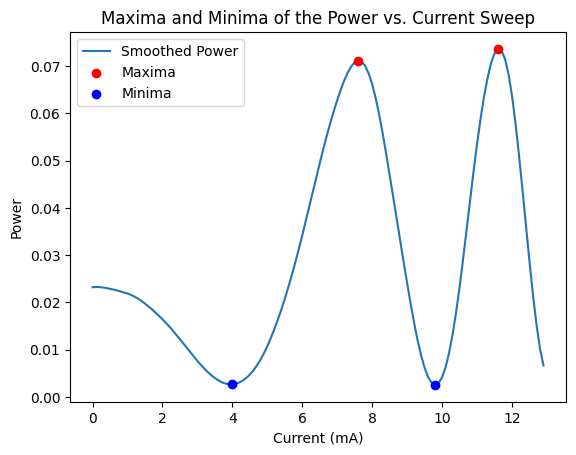

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_7.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.836 Current -0.0007
Voltage 0.1914 Current 0.109
Voltage 0.2354 Current 0.2102
Voltage 0.2817 Current 0.3129
Voltage 0.3282 Current 0.4138
Voltage 0.3761 Current 0.5173
Voltage 0.4233 Current 0.6182
Voltage 0.4715 Current 0.721
Voltage 0.5189 Current 0.8225
Voltage 0.5669 Current 0.9252
Voltage 0.6138 Current 1.0257
Voltage 0.6617 Current 1.1292
Voltage 0.709 Current 1.2313
Voltage 0.7561 Current 1.3326
Voltage 0.8031 Current 1.4335
Voltage 0.8499 Current 1.5347
Voltage 0.8971 Current 1.6369
Voltage 0.9434 Current 1.7375
Voltage 0.9904 Current 1.8403
Voltage 1.0366 Current 1.9418
Voltage 1.0834 Current 2.0439
Voltage 1.1292 Current 2.1452
Voltage 1.1758 Current 2.2488
Voltage 1.2218 Current 2.3503
Voltage 1.2683 Current 2.4528
Voltage 1.3138 Current 2.5538
Voltage 1.36 Curre

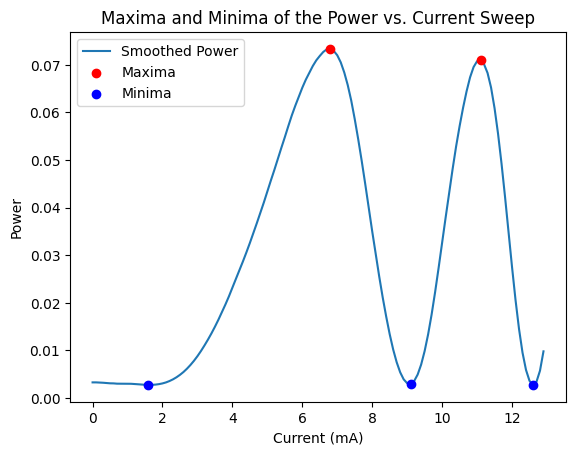

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_7.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.2029 Current -0.0041
Voltage 0.1755 Current 0.1054
Voltage 0.2262 Current 0.207
Voltage 0.2735 Current 0.3102
Voltage 0.317 Current 0.4111
Voltage 0.3662 Current 0.5145
Voltage 0.4154 Current 0.616
Voltage 0.4628 Current 0.719
Voltage 0.5098 Current 0.8202
Voltage 0.5613 Current 0.9235
Voltage 0.6065 Current 1.0243
Voltage 0.6535 Current 1.1274
Voltage 0.7025 Current 1.2293
Voltage 0.7461 Current 1.3309
Voltage 0.7978 Current 1.4328
Voltage 0.8439 Current 1.5333
Voltage 0.8913 Current 1.6361
Voltage 0.9345 Current 1.737
Voltage 0.9852 Current 1.8401
Voltage 1.0305 Current 1.9405
Voltage 1.0789 Current 2.0438
Voltage 1.1273 Current 2.1459
Voltage 1.1711 Current 2.2493
Voltage 1.2214 Current 2.3504
Voltage 1.2647 Current 2.4539
Voltage 1.3115 Current 2.5552
Voltage 1.3589 Curr

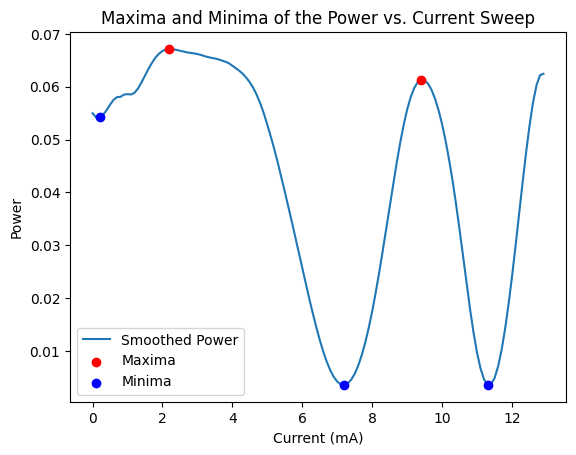

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_7.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 2.436 Current -0.0016
Voltage 0.091 Current 0.1067
Voltage 0.1368 Current 0.2085
Voltage 0.1801 Current 0.3107
Voltage 0.2257 Current 0.4116
Voltage 0.2717 Current 0.5145
Voltage 0.3196 Current 0.6162
Voltage 0.3673 Current 0.7187
Voltage 0.4158 Current 0.8204
Voltage 0.4634 Current 0.9226
Voltage 0.5119 Current 1.0232
Voltage 0.5594 Current 1.1266
Voltage 0.6077 Current 1.2277
Voltage 0.6552 Current 1.3297
Voltage 0.7029 Current 1.4314
Voltage 0.7505 Current 1.5318
Voltage 0.7976 Current 1.634
Voltage 0.8451 Current 1.7354
Voltage 0.8922 Current 1.8377
Voltage 0.9397 Current 1.9389
Voltage 0.9862 Current 2.0411
Voltage 1.0335 Current 2.1426
Voltage 1.0799 Current 2.2452
Voltage 1.127 Current 2.3466
Voltage 1.1733 Current 2.4495
Voltage 1.2203 Current 2.5506
Voltage 1.2664 Cur

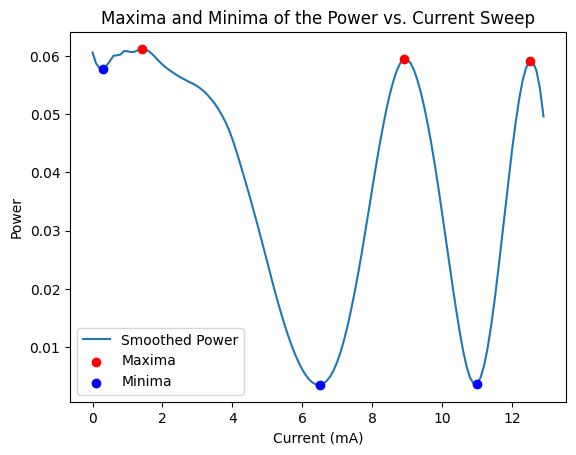

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_7.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 4.6045 Current -0.0098
Voltage 0.1943 Current 0.0966
Voltage 0.2394 Current 0.1982
Voltage 0.2861 Current 0.3013
Voltage 0.3334 Current 0.4031
Voltage 0.3816 Current 0.5056
Voltage 0.4295 Current 0.6079
Voltage 0.4781 Current 0.7115
Voltage 0.5259 Current 0.8119
Voltage 0.5743 Current 0.9156
Voltage 0.6219 Current 1.0169
Voltage 0.6701 Current 1.1205
Voltage 0.7178 Current 1.2229
Voltage 0.7654 Current 1.3259
Voltage 0.813 Current 1.4286
Voltage 0.8602 Current 1.5313
Voltage 0.9077 Current 1.6342
Voltage 0.9546 Current 1.7363
Voltage 1.002 Current 1.8394
Voltage 1.0486 Current 1.9412
Voltage 1.0958 Current 2.0451
Voltage 1.1421 Current 2.1461
Voltage 1.1892 Current 2.2487
Voltage 1.2356 Current 2.3512
Voltage 1.2824 Current 2.454
Voltage 1.3285 Current 2.5559
Voltage 1.375 Cur

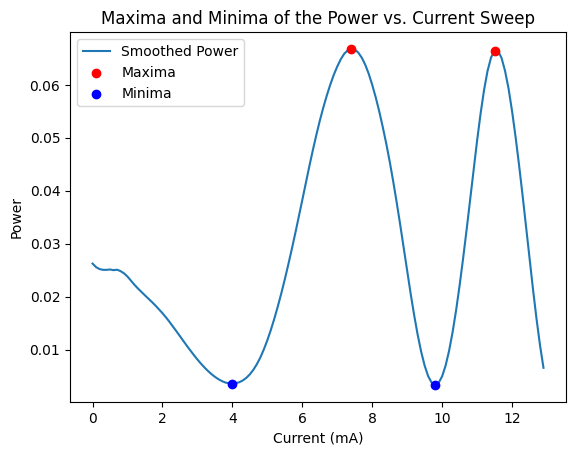

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_8.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 5.9049 Current -0.0006
Voltage 0.1913 Current 0.1092
Voltage 0.2356 Current 0.2103
Voltage 0.2817 Current 0.3132
Voltage 0.3282 Current 0.4145
Voltage 0.3761 Current 0.5171
Voltage 0.4233 Current 0.619
Voltage 0.4714 Current 0.7215
Voltage 0.5187 Current 0.823
Voltage 0.5668 Current 0.9263
Voltage 0.6137 Current 1.0263
Voltage 0.6616 Current 1.1298
Voltage 0.7088 Current 1.2316
Voltage 0.7559 Current 1.3327
Voltage 0.8029 Current 1.4341
Voltage 0.8497 Current 1.5355
Voltage 0.8969 Current 1.6375
Voltage 0.9432 Current 1.7383
Voltage 0.9902 Current 1.841
Voltage 1.0364 Current 1.9417
Voltage 1.0832 Current 2.0446
Voltage 1.1289 Current 2.1458
Voltage 1.1756 Current 2.2492
Voltage 1.2216 Current 2.3506
Voltage 1.268 Current 2.4535
Voltage 1.3135 Current 2.5546
Voltage 1.3597 Cur

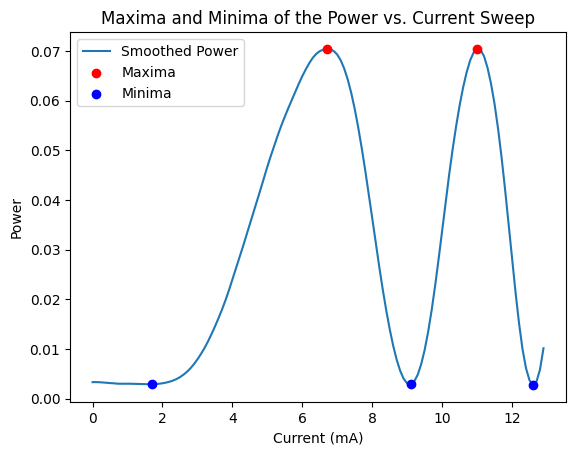

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_8.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.1388 Current -0.0043
Voltage 0.176 Current 0.1056
Voltage 0.2233 Current 0.2073
Voltage 0.2721 Current 0.3101
Voltage 0.3169 Current 0.4108
Voltage 0.3678 Current 0.5146
Voltage 0.4123 Current 0.6159
Voltage 0.46 Current 0.7192
Voltage 0.509 Current 0.8204
Voltage 0.5606 Current 0.9235
Voltage 0.605 Current 1.0251
Voltage 0.6536 Current 1.1278
Voltage 0.7045 Current 1.2287
Voltage 0.7505 Current 1.3309
Voltage 0.7943 Current 1.4325
Voltage 0.8456 Current 1.5326
Voltage 0.8884 Current 1.6349
Voltage 0.9395 Current 1.7364
Voltage 0.9857 Current 1.8396
Voltage 1.0254 Current 1.9404
Voltage 1.0782 Current 2.0442
Voltage 1.1253 Current 2.1447
Voltage 1.171 Current 2.2478
Voltage 1.2194 Current 2.3497
Voltage 1.2656 Current 2.453
Voltage 1.3104 Current 2.5545
Voltage 1.3606 Curren

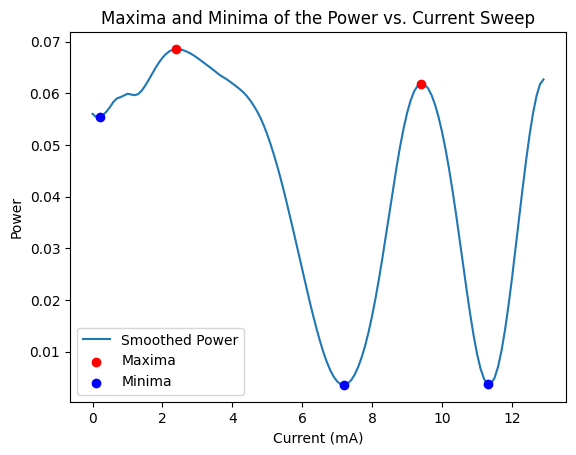

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_8.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 2.7589 Current -0.0011
Voltage 0.0904 Current 0.1072
Voltage 0.1363 Current 0.2084
Voltage 0.1798 Current 0.3107
Voltage 0.2255 Current 0.4118
Voltage 0.2717 Current 0.5149
Voltage 0.3196 Current 0.6164
Voltage 0.3673 Current 0.7187
Voltage 0.4159 Current 0.8197
Voltage 0.4635 Current 0.9222
Voltage 0.512 Current 1.0235
Voltage 0.5596 Current 1.1267
Voltage 0.6078 Current 1.2271
Voltage 0.6553 Current 1.3294
Voltage 0.703 Current 1.4313
Voltage 0.7506 Current 1.5322
Voltage 0.7977 Current 1.6333
Voltage 0.8453 Current 1.7348
Voltage 0.8923 Current 1.8371
Voltage 0.9398 Current 1.9381
Voltage 0.9863 Current 2.0407
Voltage 1.0336 Current 2.1418
Voltage 1.08 Current 2.2447
Voltage 1.1272 Current 2.3459
Voltage 1.1735 Current 2.4486
Voltage 1.2204 Current 2.5493
Voltage 1.2665 Cur

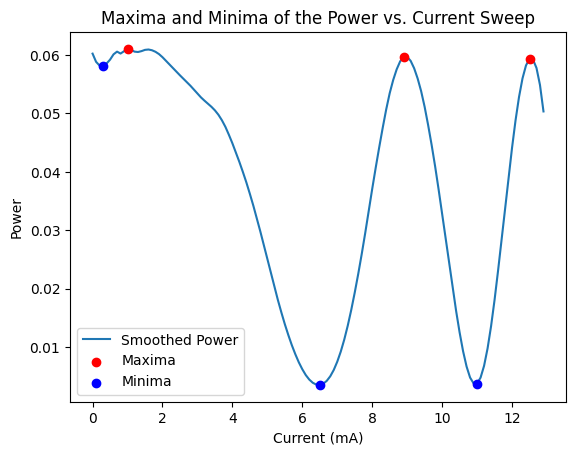

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_8.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 4.5398 Current -0.0093
Voltage 0.1938 Current 0.0966
Voltage 0.2391 Current 0.1985
Voltage 0.2859 Current 0.3008
Voltage 0.3333 Current 0.4025
Voltage 0.3816 Current 0.5061
Voltage 0.4296 Current 0.6076
Voltage 0.4782 Current 0.7108
Voltage 0.526 Current 0.812
Voltage 0.5745 Current 0.9156
Voltage 0.622 Current 1.0164
Voltage 0.6703 Current 1.1199
Voltage 0.718 Current 1.222
Voltage 0.7656 Current 1.3247
Voltage 0.8132 Current 1.428
Voltage 0.8604 Current 1.5305
Voltage 0.9079 Current 1.6337
Voltage 0.9549 Current 1.7353
Voltage 1.0022 Current 1.8389
Voltage 1.0488 Current 1.9406
Voltage 1.0961 Current 2.0433
Voltage 1.1424 Current 2.1444
Voltage 1.1895 Current 2.2478
Voltage 1.2359 Current 2.3499
Voltage 1.2827 Current 2.4527
Voltage 1.3288 Current 2.5541
Voltage 1.3753 Curre

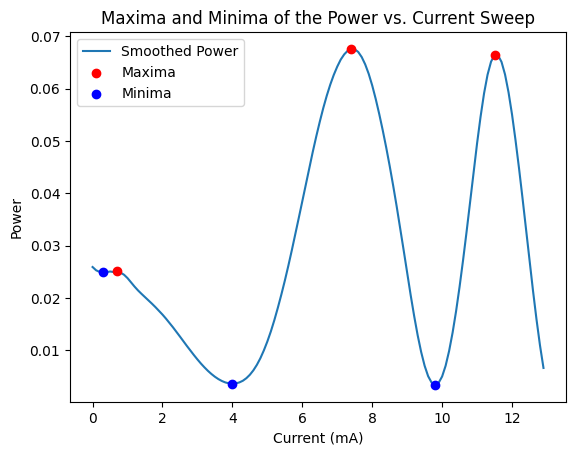

Data saved to .data\4x4_MZI_X\min_loop\0\30_1550.0_9.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 5.866 Current -0.0006
Voltage 0.1909 Current 0.1091
Voltage 0.2353 Current 0.2101
Voltage 0.2815 Current 0.3132
Voltage 0.328 Current 0.4138
Voltage 0.376 Current 0.5173
Voltage 0.4232 Current 0.6185
Voltage 0.4714 Current 0.7215
Voltage 0.5187 Current 0.8225
Voltage 0.5668 Current 0.9255
Voltage 0.6137 Current 1.0266
Voltage 0.6617 Current 1.1292
Voltage 0.7088 Current 1.231
Voltage 0.756 Current 1.3324
Voltage 0.803 Current 1.4336
Voltage 0.8498 Current 1.5341
Voltage 0.8969 Current 1.6366
Voltage 0.9432 Current 1.737
Voltage 0.9902 Current 1.8403
Voltage 1.0364 Current 1.9411
Voltage 1.0833 Current 2.0445
Voltage 1.129 Current 2.1454
Voltage 1.1757 Current 2.2482
Voltage 1.2217 Current 2.35
Voltage 1.2681 Current 2.4528
Voltage 1.3136 Current 2.5539
Voltage 1.3598 Current 2

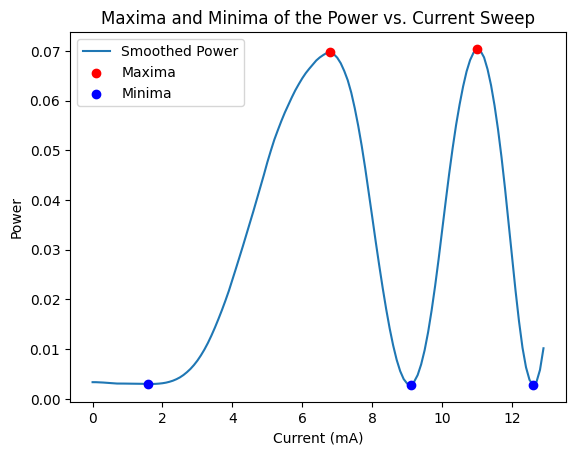

Data saved to .data\4x4_MZI_X\min_loop\0\28_1550.0_9.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 0.138 Current -0.0035
Voltage 0.1758 Current 0.1056
Voltage 0.2237 Current 0.2074
Voltage 0.2695 Current 0.31
Voltage 0.3175 Current 0.4107
Voltage 0.3673 Current 0.5138
Voltage 0.4155 Current 0.6158
Voltage 0.4625 Current 0.7193
Voltage 0.5085 Current 0.8198
Voltage 0.5568 Current 0.9235
Voltage 0.6077 Current 1.0241
Voltage 0.6513 Current 1.1277
Voltage 0.7042 Current 1.2282
Voltage 0.748 Current 1.3304
Voltage 0.797 Current 1.432
Voltage 0.8423 Current 1.5323
Voltage 0.8934 Current 1.6343
Voltage 0.9422 Current 1.7358
Voltage 0.9855 Current 1.839
Voltage 1.0308 Current 1.9398
Voltage 1.078 Current 2.0426
Voltage 1.1239 Current 2.144
Voltage 1.1727 Current 2.2478
Voltage 1.2184 Current 2.3487
Voltage 1.2695 Current 2.4522
Voltage 1.3114 Current 2.5534
Voltage 1.3578 Current 

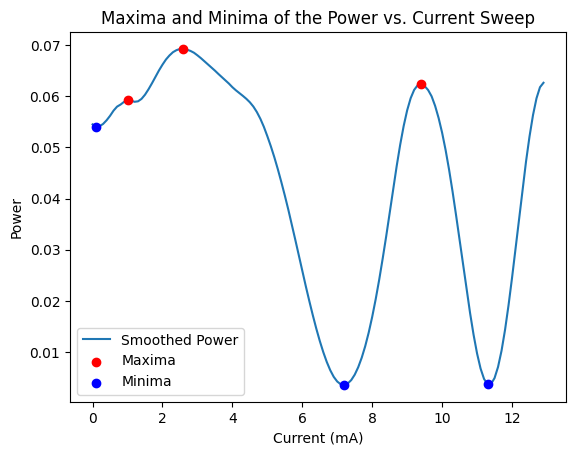

Data saved to .data\4x4_MZI_X\min_loop\0\26_1550.0_9.pkl
Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage 3.0578 Current -0.0013
Voltage 0.0901 Current 0.1074
Voltage 0.136 Current 0.2083
Voltage 0.1795 Current 0.3112
Voltage 0.2253 Current 0.4117
Voltage 0.2716 Current 0.5145
Voltage 0.3196 Current 0.6154
Voltage 0.3673 Current 0.719
Voltage 0.416 Current 0.819
Voltage 0.4636 Current 0.9222
Voltage 0.5121 Current 1.0227
Voltage 0.5597 Current 1.126
Voltage 0.6079 Current 1.2269
Voltage 0.6554 Current 1.3291
Voltage 0.7032 Current 1.4304
Voltage 0.7508 Current 1.5309
Voltage 0.7979 Current 1.6326
Voltage 0.8455 Current 1.7338
Voltage 0.8925 Current 1.8362
Voltage 0.94 Current 1.9367
Voltage 0.9865 Current 2.0397
Voltage 1.0339 Current 2.141
Voltage 1.0802 Current 2.2437
Voltage 1.1274 Current 2.3445
Voltage 1.1737 Current 2.4476
Voltage 1.2206 Current 2.5488
Voltage 1.2667 Current

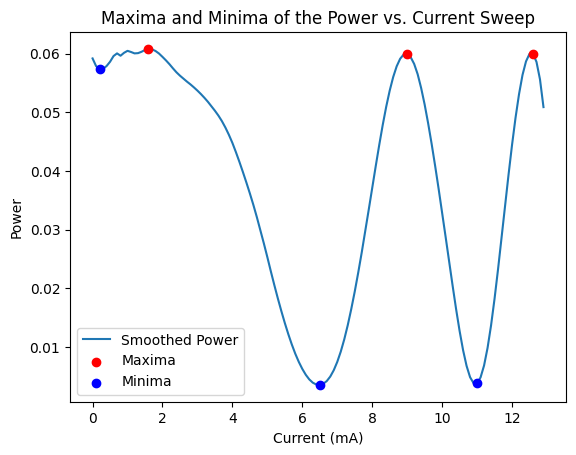

Data saved to .data\4x4_MZI_X\min_loop\0\24_1550.0_9.pkl


In [40]:
input = True
if input:
    
    phase_shifter_set_ports = [ phase_shifters[0][0][0],
                                phase_shifters[0][0][1],
                                phase_shifters[0][1][0],
                                phase_shifters[0][1][1],
                                phase_shifter_mzm[0],
                                phase_shifter_mzm[2],
                                phase_shifter_mzm[4],
                                phase_shifter_mzm[6]
                            ]
    
    phase_shifter_set_list = [6.5,6.5,6.5,6.5,None, None, None, None]
    
    iterations = 10
    current = np.arange(0, i_max, step_iv)
    current_squared = current**2
    data_saving_path = f"{chip_name}\\min_loop\\1"
    
    min_intensity_values = [[],[],[],[]]
    for iteration in range(iterations):
        for psp_i,psp in enumerate(phase_shifter_set_ports[-4:]):
            phase_shifter_port = psp
            V_raw,I_raw,V_phs,I_phs = func.sweep_current_collect_ports(phase_shifter_port,nidaq_channels,sampling_rate,n_sample,i_max,step_iv,phase_shifter_set_list,phase_shifter_set_ports)
            P = func.to_mean_power(V_raw,I_raw)
            P_tot = np.array(P[:8]).sum(axis = 0)
            maxmin = func.maxmin_prominence(P_tot,current,min_prominence=0.0001,min_distance=15)
            min_current = maxmin[2][maxmin[3].argmin()]
            phase_shifter_set_list[psp_i] = float(min_current)
            DevInfo = func.device_tunning_info(phase_shifter_port, V_raw, I_raw,V_phs, I_phs, None, current)
            func.save_dict(DevInfo, data_saving_path)
            min_intensity_values[psp_i].append(P_tot[np.array(P_tot).argmin()])
            

In [1]:
phase_shifter_set_ports[-4:]

NameError: name 'phase_shifter_set_ports' is not defined

In [70]:
L = [1,2,3] + [2,3,6]
L[-2:]

[3, 6]

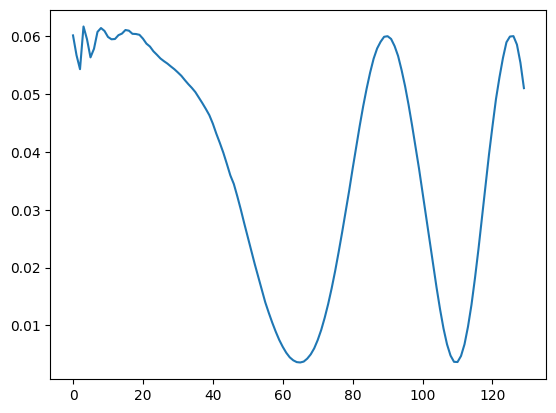

In [50]:
plt.plot(P[])
plt.show()

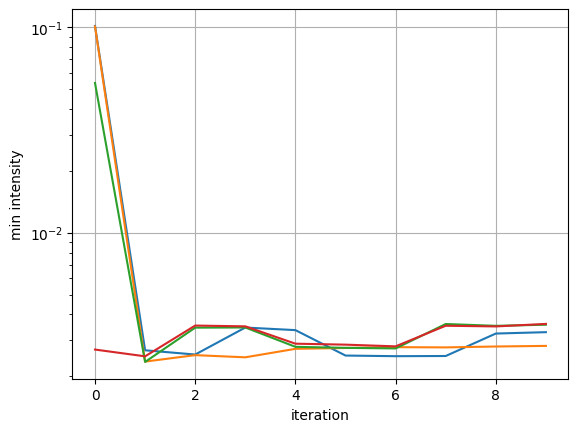

In [46]:
for i in (min_intensity_values):
    plt.semilogy(i)
plt.xlabel("iteration")
plt.ylabel("min intensity")
plt.grid()
plt.show()

In [58]:
phase_shifter_set_list


[9.8, 12.600000000000001, 7.2, 6.5]

Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 13 with 130 steps.
Voltage -0.0001 Current 0.0036
Time to write 0.015807390213012695 and the time to acquire0.09382510185241699
Voltage 0.0327 Current 0.1128
Time to write 0.01612710952758789 and the time to acquire0.07999897003173828
Voltage 0.0921 Current 0.214
Time to write 0.019997596740722656 and the time to acquire0.09805035591125488
Voltage 0.1353 Current 0.3169
Time to write 0.012045145034790039 and the time to acquire0.08710098266601562
Voltage 0.1864 Current 0.4175
Time to write 0.010000228881835938 and the time to acquire0.07999920845031738
Voltage 0.2306 Current 0.5202
Time to write 0.016088247299194336 and the time to acquire0.08003377914428711
Voltage 0.2713 Current 0.6217
Time to write 0.014956235885620117 and the time to acquire0.0700235366821289
Voltage 0.337 Current 0.7248
Time to write 0.020000457763671875 and the time to acquire0.087764263

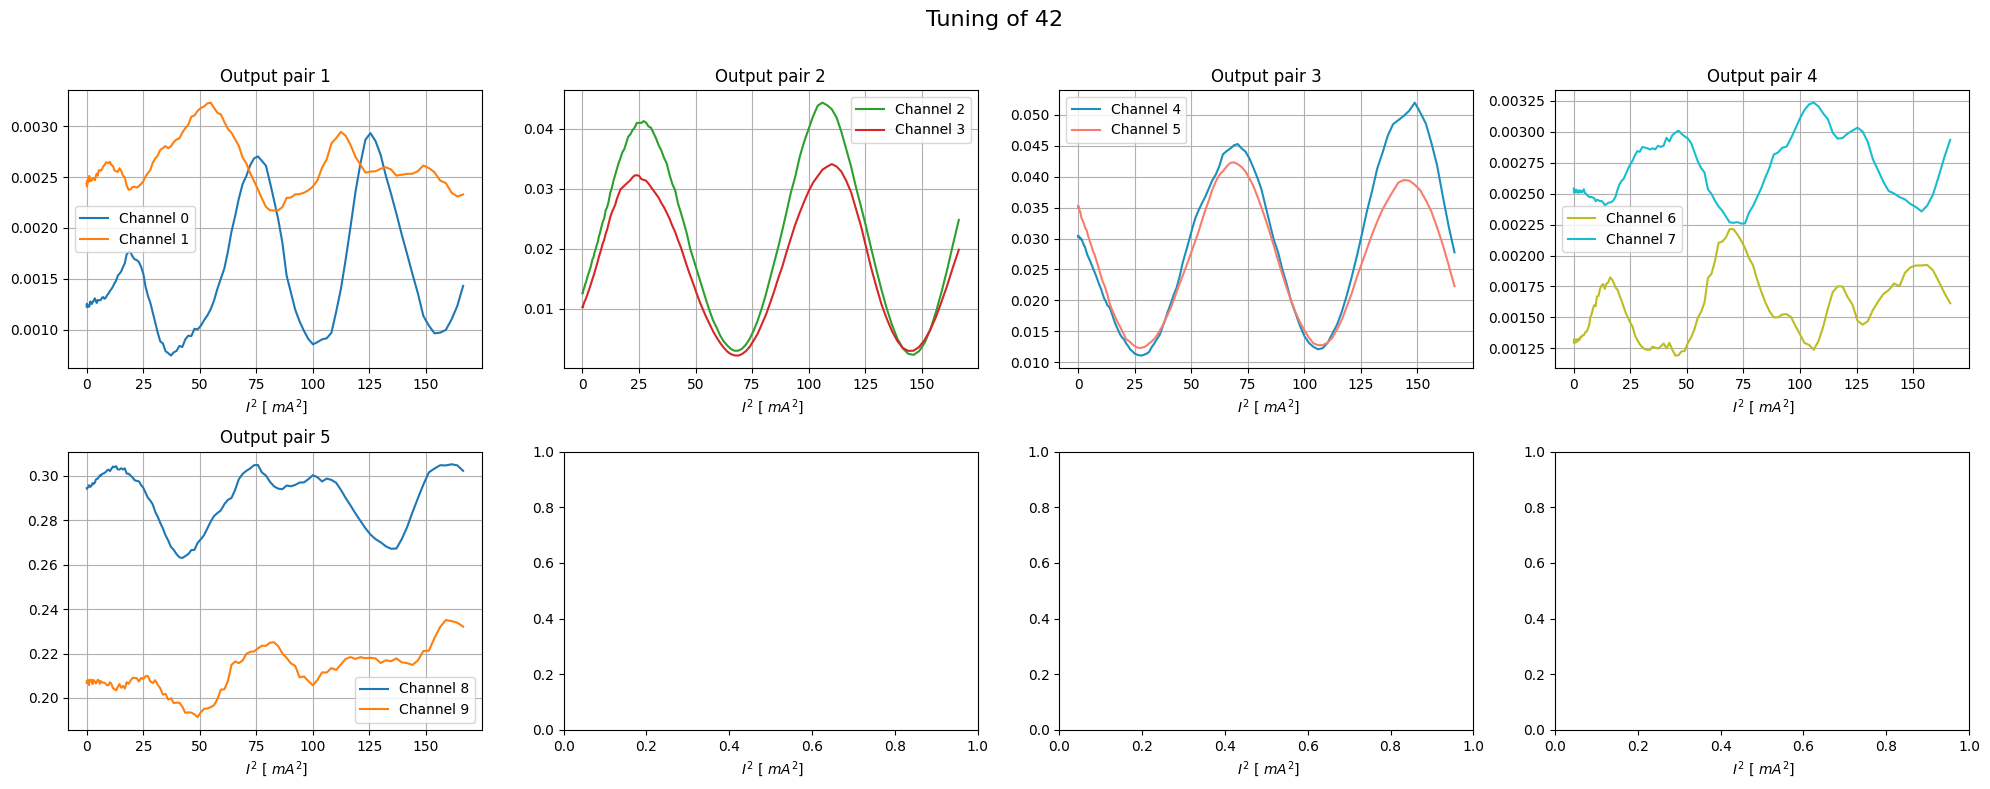

In [36]:
input = False
if input:
    phase_shifter_port = phase_mask[1]
    current = np.arange(0, i_max, step_iv)
    current_squared = current**2
    V_raw,I_raw,V_phs,I_phs = func.sweep_current_collect_ports(phase_shifter_port,nidaq_channels,sampling_rate,n_sample,i_max,step_iv)
    P = func.to_mean_power(V_raw,I_raw)
    func.plot_channels(P, current_squared, phase_shifter_port)
    # DevInfo = func.device_tunning_info(phase_shifter_port, V_raw, I_raw,V_phs, I_phs, None, current)
    # func.save_dict(DevInfo, f"blue\\phase_shifter\\current\\0")

#### Current sweep diagonal

In [9]:
# Current tunning
input = False
ps_top_bottom_crossing   =[phase_shifters[0][0][1],
                           phase_shifters[1][0][1],
                           phase_shifters[2][1][0]
                          ]
phase_shifter_set        = [ [30, 1], [27, 0], [26, 0],[23, 0] ]
phase_shifter_set_folder = f".data\\blue\\mzm\\max_min"
rep = 10
if input :
    current = np.arange(0, i_max, step_iv)
    current_squared = current**2
    for repet in range(rep):
        for phase_shifter_port in ps_top_bottom_crossing:
            V_raw,I_raw,V_phs,I_phs = func.sweep_current_collect_ports(phase_shifter_port,nidaq_channels,sampling_rate,n_sample,i_max,step_iv,phase_shifter_set,phase_shifter_set_folder)
            P = func.to_mean_power(V_raw,I_raw)
            # func.plot_channels(P, current_squared, phase_shifter_port)
            DevInfo = func.device_tunning_info(phase_shifter_port, V_raw, I_raw,V_phs, I_phs, None, current)
            func.save_dict(DevInfo, f"{chip_name}\\phase_shifter\\current\\top_bottom_crossing\\{repet}")

#### Plot dictionnary values and fitting

8
c:\Users\QPG\Downloads\Marseille\Marseille\.data\4x4_MZI_X\mzm\current
Number of folders in c:\Users\QPG\Downloads\Marseille\Marseille\.data\4x4_MZI_X\mzm\current: 5
5 5


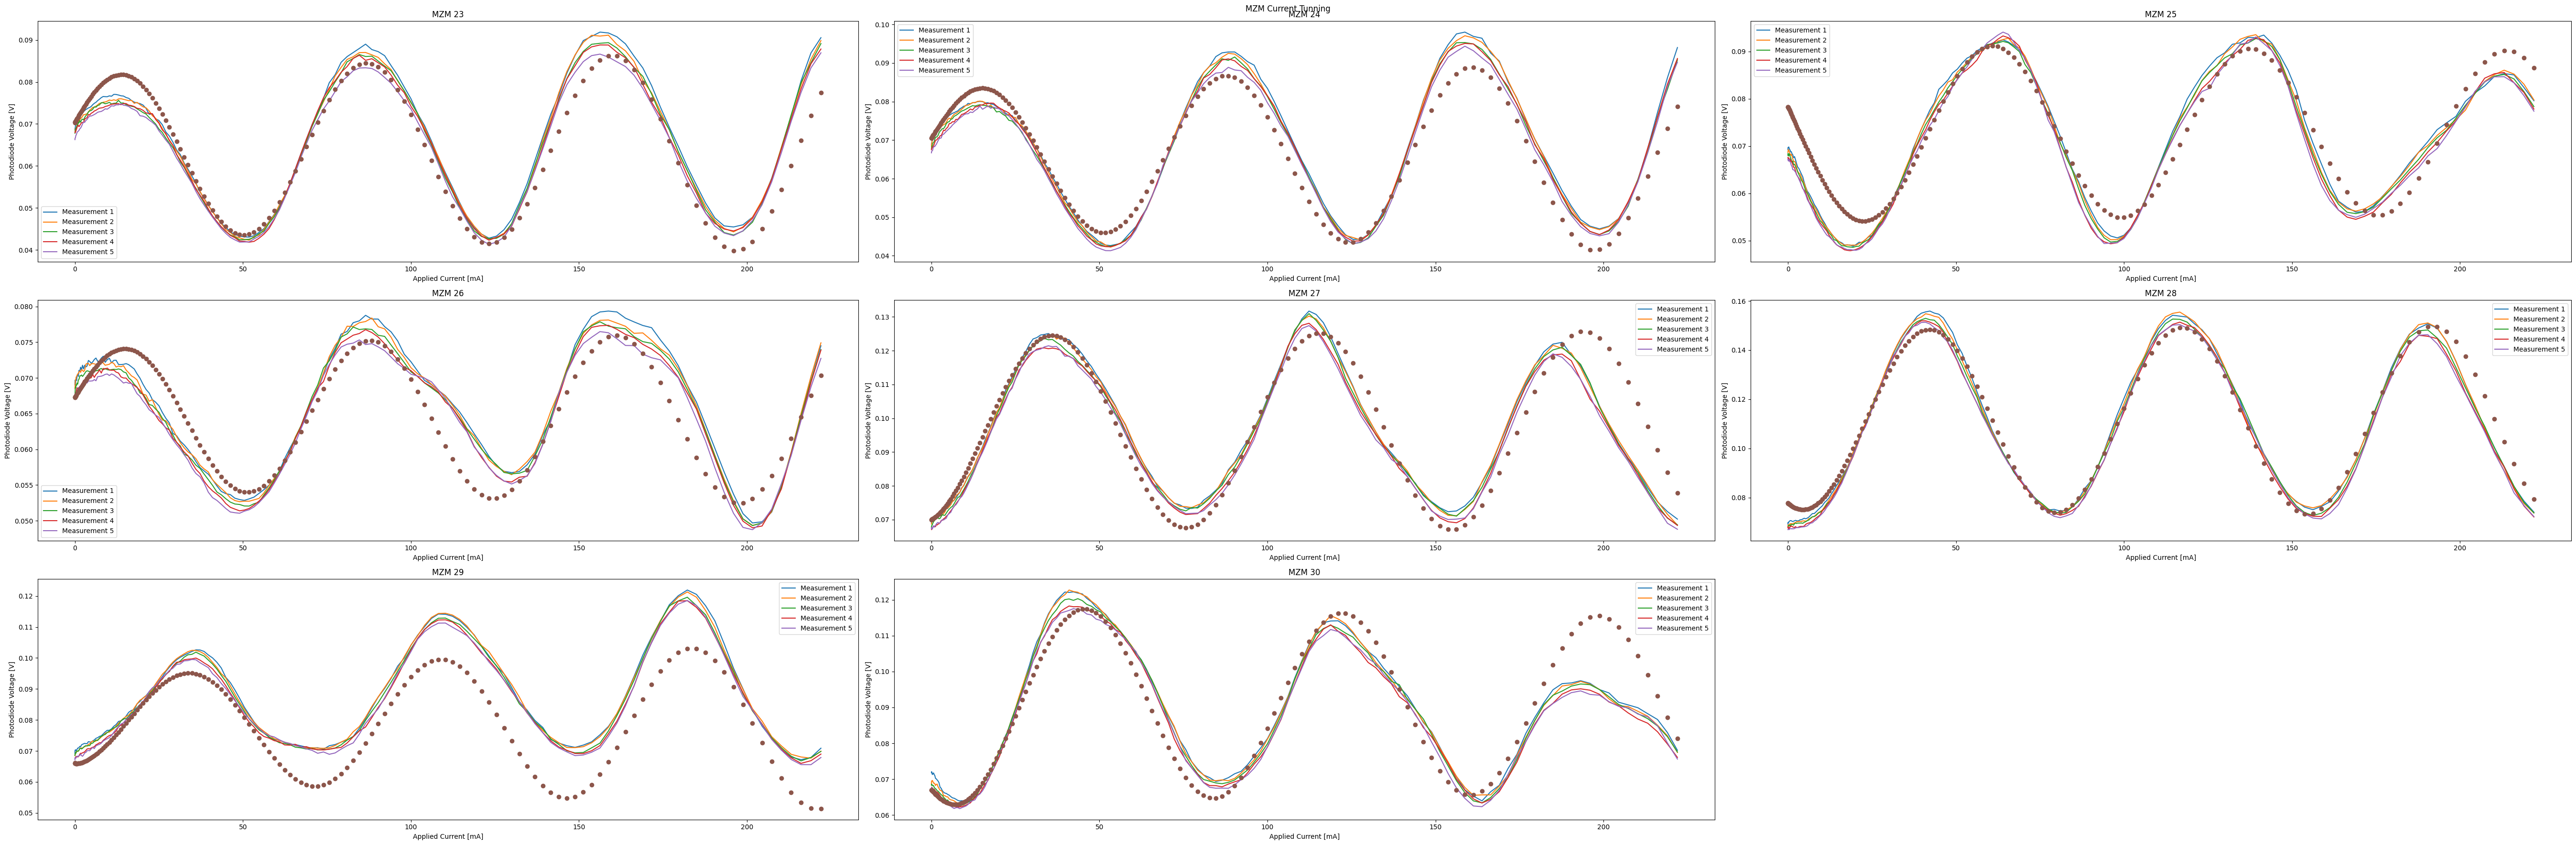

In [57]:
# Define the folder and parameters
meas_folder = f".data\\{chip_name}\\mzm\\current"
get_n_meas  = 5
dev_names   = [34,37,41]
dev_names   = [23,24,25,26,27,28,29,30]

cha_names   = [0,1,2,3,4,5,6,7]

fit_folder = f".data\\{chip_name}\\mzm\\fitting_params\\current"
fit_param = func.read_pkls_in_current_directory(fit_folder)
print(len(fit_param))
# Get data
list_data,X,DEVICES = func.get_data(meas_folder,get_n_meas,dev_names,cha_names)
X_squared = X**2
plot_rows = (len(list_data)+2)//3
plt.figure(figsize=(18*plot_rows, 6*plot_rows))

# Loop through MZMs
for mzm_index,data in enumerate(list_data):
    
    fit_param          = func.read_pkls_in_current_directory(fit_folder)
    imported_fit_param = func.get_parameters_as_list(fit_param[mzm_index])
    mzm_fitted         = func.mzm_transfer(X,*imported_fit_param[1:10])

    
    plot_rows = (len(list_data)+2)//3
    plt.subplot(plot_rows, 3, mzm_index + 1)
    plt.suptitle(f'MZM Current Tunning')
    for folder_index, v_sum_data in enumerate(data):
        plt.plot(X_squared, v_sum_data, label=f'Measurement {folder_index + 1}')
    plt.plot(X_squared,mzm_fitted,marker='o',linestyle='')
    plt.title(fr"MZM {dev_names[mzm_index]}")
    plt.xlabel('Applied Current [mA]')
    plt.ylabel('Photodiode Voltage [V]')
    plt.legend()

# Adjust the layout for the subplots
plt.tight_layout()

# Show the plots
plt.show()

In [52]:
fit_param[0]

{'device_name': 23,
 'offset': 0.06347067291376776,
 'amplitude': 0.01668052352193857,
 'alpha': 0.025049699738242188,
 'p1': -0.05485985804219447,
 'p2': 1.2328894218819086e-06,
 'p3': 1.706922780739281e-08,
 'p4': 1.1080718402098962e-08,
 'P_pi': 2.007271399247017,
 'phase': 1.1477894852056547,
 'Best R-squared': 0.901569700195046}

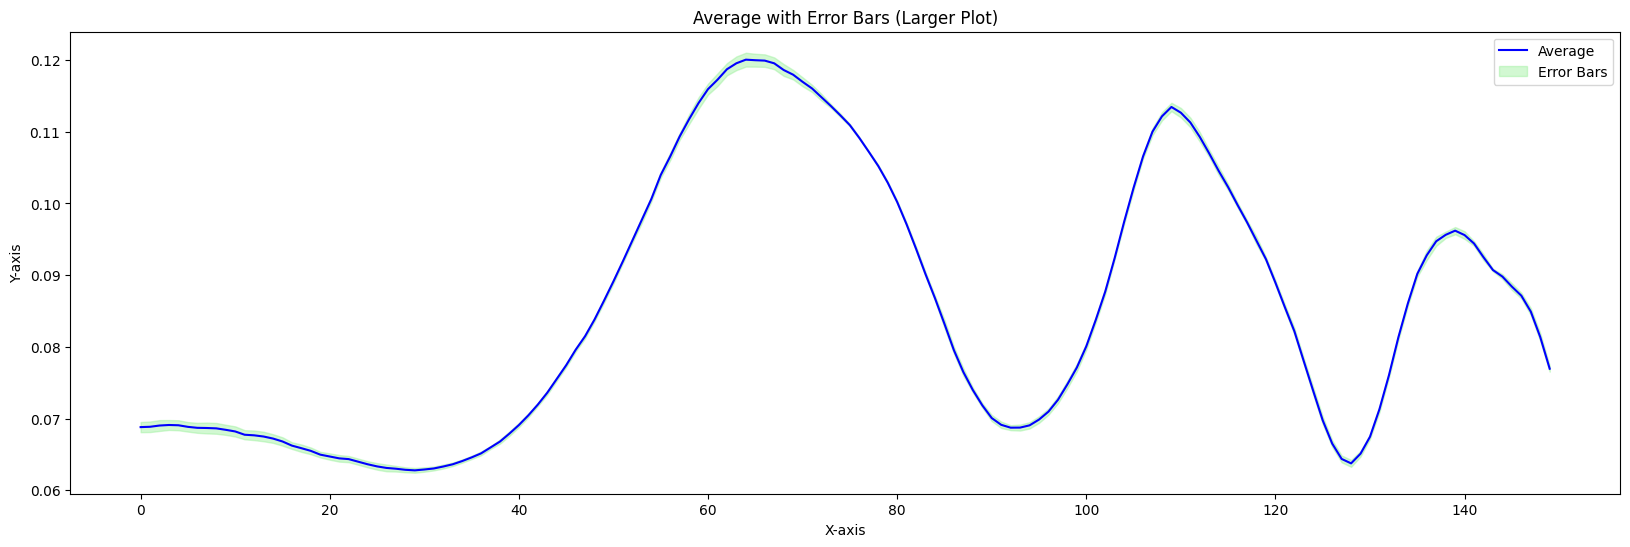

In [ ]:
device_index = 7
data = list_data[device_index]

# Calculate the average and standard error (SEM)
average = np.mean(data, axis=0)
sem = np.std(data, axis=0) / np.sqrt(len(data))

# Create x values (e.g., assuming data points are equally spaced)
x = np.arange(len(average))

# Create a larger figure
plt.figure(figsize=(20, 6))  # Adjust the figsize as needed

# Plot the average
plt.plot(x, average, label='Average', color='b')  # Use blue for the average line

# Plot the error bars as a shaded region with a different color (e.g., green)
plt.fill_between(x, average - sem, average + sem, alpha=0.4, color='lightgreen', label='Error Bars')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Average with Error Bars (Larger Plot)')
plt.legend()
plt.show()

Best Parameters:
[ 9.07623697e-02  2.85500151e-02 -1.00152004e-02  5.19876340e-02
  1.37890824e-06  1.06169695e-07  1.01065555e-07  2.00041165e+00
  2.55437788e+00 -8.90000000e-07] 0.9670831164009006


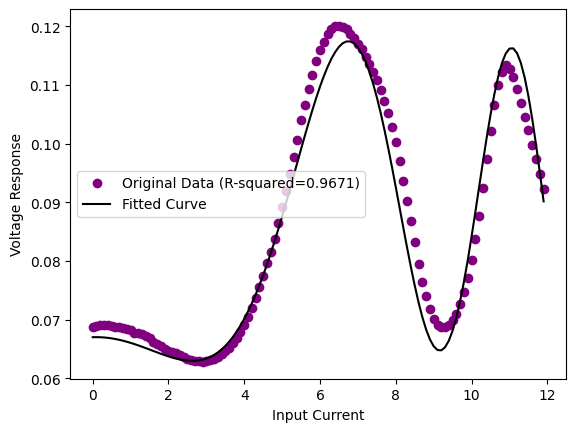

0.9670831164009006


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the voltage_non_ohmic function with Y, Z, alpha, and beta parameters
def voltage_non_ohmic(I, p1, p2, p3, p4):
    return (p4 * I**4 + p3 * I**3 + p2 * I**2 + p1 * I)

def cross_talk(I, alpha):
    return np.exp(alpha * I )

def mzm_transfer(I, offset, amplitude, alpha, p1, p2, p3, p4, P_pi, phase, R):
    return offset + amplitude * cross_talk(I, alpha) * np.cos((I * voltage_non_ohmic(I, p1, p2, p3, p4)) / P_pi * np.pi + phase) + R*I

# Provided data to fit
I_data = average[0:120]  # Assuming V_sum is your data
X_data = X[0:120]

# Define parameter names
param_names = ['offset', 'amplitude', 'alpha', 'p1', 'p2', 'p3', 'p4', 'P_pi', 'phase','R']

# Define parameter bounds and increments
amplitude = (np.array(I_data).max() - np.array(I_data).min()) / 2
offset = amplitude + np.array(I_data).min()
alpha = -0.01
p1 = 0.052
p2 = 0.00000100
p3 = 0.00000010
p4 = 0.0000001
P_pi = 2
phase = 2.65
R = 0.0000001
# Define bounds for the parameters based on the initial parameters
param_bounds = ([offset * 0.95, amplitude * 0.99, alpha - 0.0001, p1 - 0.0001, p2 - 0.001, p3 - 0.001, p4 - 0.001, P_pi * 0.90, phase - 1,R-0.000001],  # Lower bounds
                [offset * 1.05, amplitude * 1.01, alpha + 0.0001, p1 + 0.0001, p2 + 0.001, p3 + 0.001, p4 + 0.001, P_pi * 1.10, phase + 1,R+0.000001])  # Upper bounds

initial_guess = [offset, amplitude, alpha, p1, p2, p3, p4, P_pi, phase, R]
try:
    params, covariance = curve_fit(mzm_transfer, X_data**2, I_data, p0=initial_guess, bounds=param_bounds, maxfev=100)
    y_fit = mzm_transfer(X_data, *params)
    r_squared = r2_score(I_data, y_fit)

except Exception as e:
    print("Error during curve fitting:", e)

# Print the best parameters and R-squared
print("Best Parameters:")

# Plot the original data and the fitted curve with the best parameters
y_fit = mzm_transfer(X_data, *params)

# Calculate the R-squared (coefficient of determination)
r_squared = r2_score(I_data, y_fit)
print(params,r_squared)
plt.plot(X_data, I_data, label=f'Original Data (R-squared={r_squared:.4f})', marker='o', linestyle='none', color='purple')
plt.plot(X_data, y_fit, label='Fitted Curve', color='black')
plt.xlabel('Input Current')
plt.ylabel('Voltage Response')
plt.legend()
plt.show()
print(r_squared)

In [ ]:
fit_folder = f".data\\blue\\mzm\\fitting_params\\current"
dictionary = func.read_pkls_in_current_directory(fit_folder)
params     = func.get_parameters_as_list(dictionary[7])
params[1:10]

[0.09076236971361705,
 0.028550015110061184,
 -0.010015200412488002,
 0.051987634040820935,
 1.3789082385313673e-06,
 1.0616969473630816e-07,
 1.0106555506473652e-07,
 2.000411646671713,
 2.554377875230752]

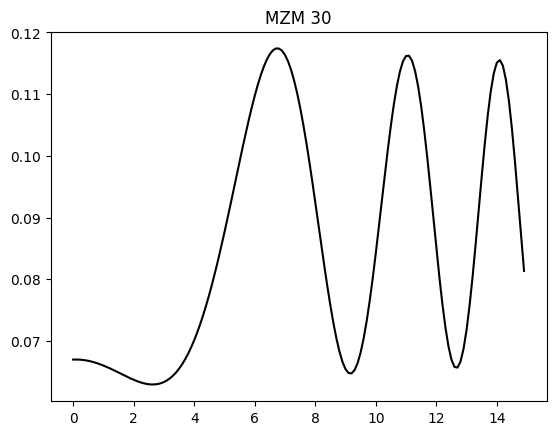

0.8961528850475354


In [ ]:

PYPY = average
PUPU = X



POPO = func.mzm_transfer(PUPU, *params[1:10])
plt.plot(PUPU, POPO, color='black')
plt.title(f"MZM {params[0]}")
plt.show()

print(r2_score(PYPY, POPO))

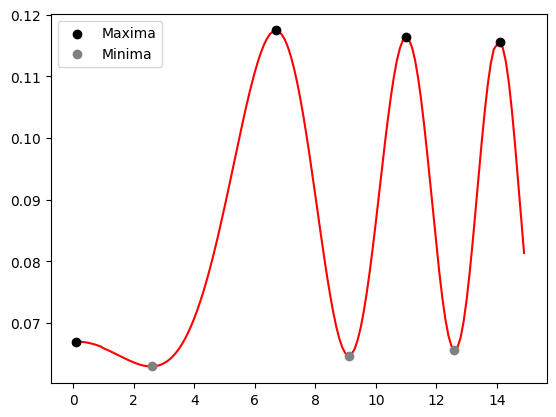

[6.7, 11.0, 14.1] [2.6, 9.1, 12.6]


In [ ]:
Max,Min = func.maxmin([POPO],PUPU)
print(Max[0][1:],Min[0])

In [ ]:
input = False
max_min_folder = f".data\\blue\\mzm"
if input:
    device_minmax = func.create_device_minmiax_info(params[0],Max[0][1:],Min[0])
    func.save_fitting_params(device_minmax,"max_min","max_min",max_min_folder)

In [ ]:
input = False
# to remove R
# params = np.delete(params,-1)
if input:
    d = func.create_parameter_dictionary(DEVICES[device_index],*params,r_squared)
    func.save_fitting_params(d,meas_folder)

In [ ]:
import importlib
importlib.reload(func)

<module 'functions' from 'c:\\Users\\QPG\\Downloads\\Marseille\\Marseille\\functions.py'>